In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data_spa = pd.read_csv('Sparkling.csv')

In [4]:
data_spa.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
data_spa.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [6]:
num_months = len(data_spa)

date_range = pd.date_range(start='01/30/1980', periods=num_months, freq='M')


In [7]:
date_range

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [16]:
data_spa['Year_Month']  = pd.to_datetime(date_range)


In [17]:
data_spa.set_index('Year_Month',inplace= True)

In [18]:
data_spa

YearMonth  Sparkling
Year_Month                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471
...              ...        ...
1995-03-31   1995-03       1897
1995-04-30   1995-04       1862
1995-05-31   1995-05       1670
1995-06-30   1995-06       1688
1995-07-31   1995-07       2031

[187 rows x 2 columns]

In [11]:
data_spa.isna().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [12]:

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

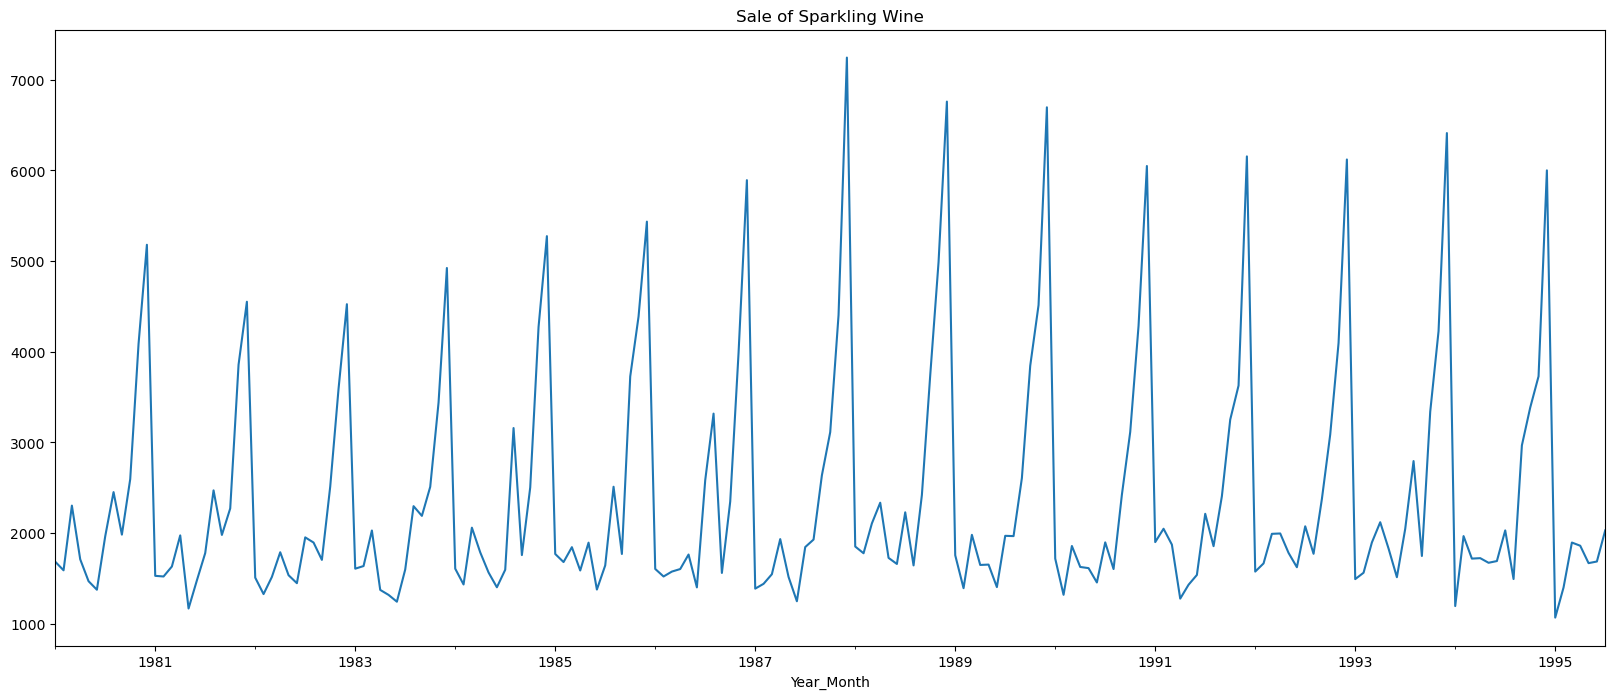

In [12]:
data_spa['Sparkling'].plot();
plt.title('Sale of Sparkling Wine');

In [13]:
data_spa.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

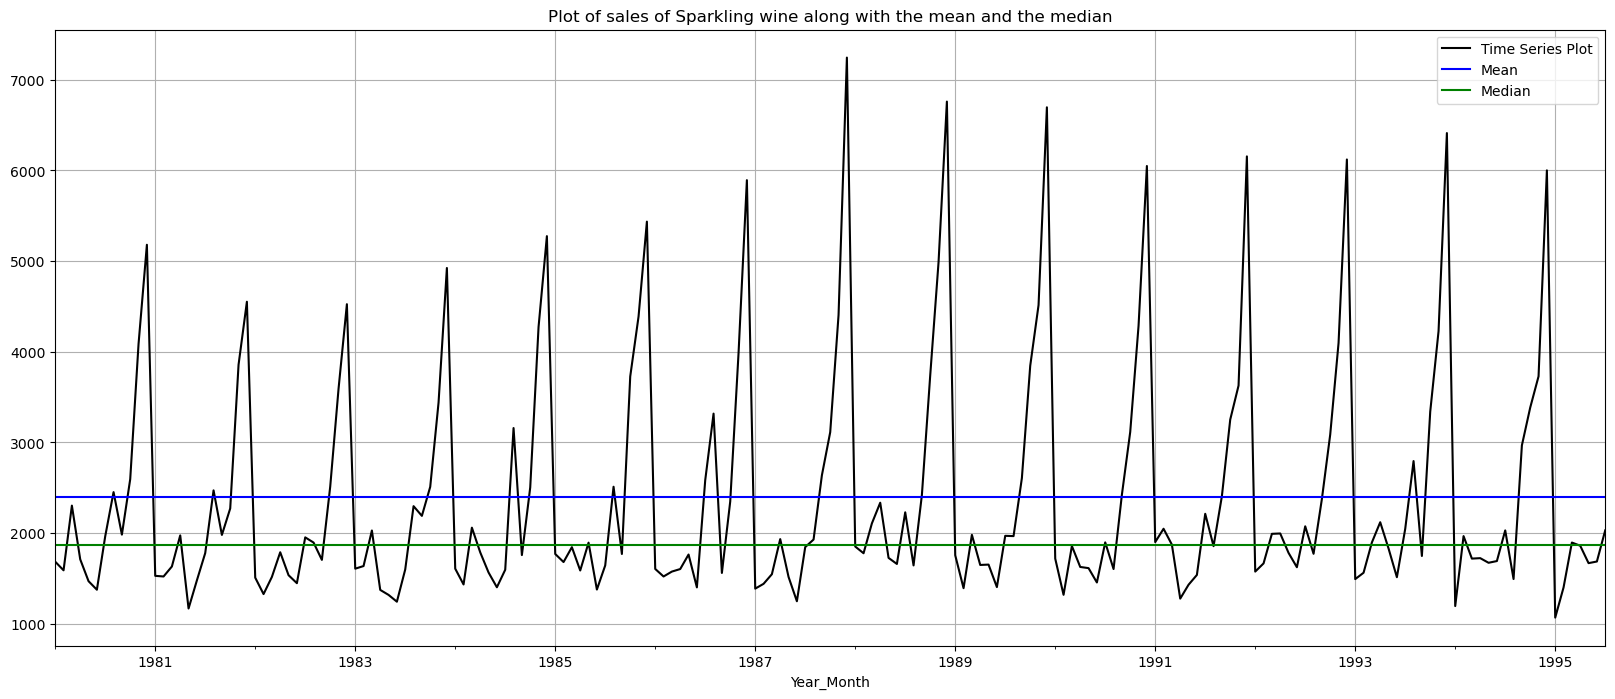

In [14]:
data_spa.plot(color='Black')
plt.axhline(data_spa['Sparkling'].mean(),color='Blue')
plt.axhline(data_spa['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);
plt.title('Plot of sales of Sparkling wine along with the mean and the median');

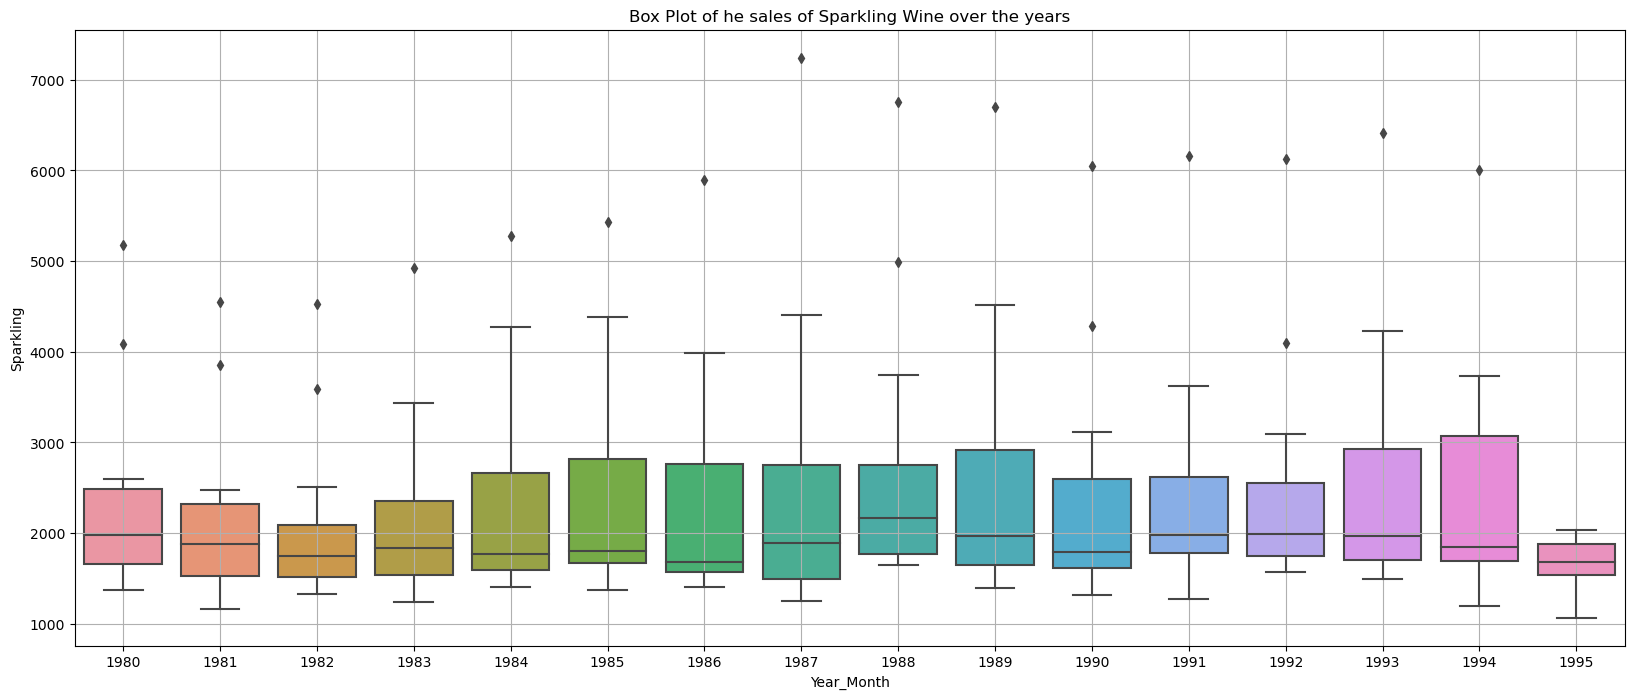

In [15]:
sns.boxplot(x = data_spa.index.year,y = data_spa['Sparkling'])
plt.grid();
plt.title('Box Plot of he sales of Sparkling Wine over the years');

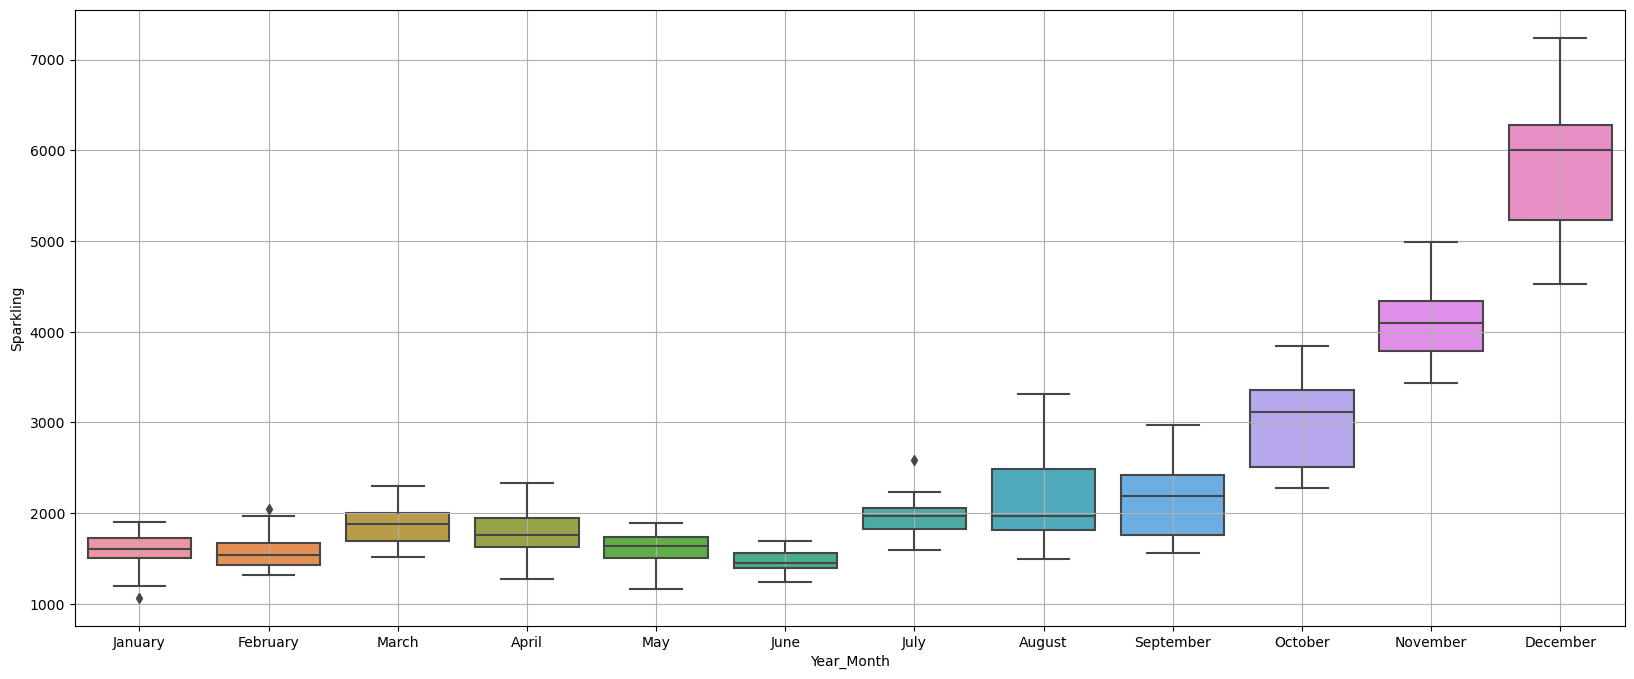

In [16]:
#Monthly Plot
sns.boxplot(x = data_spa.index.month_name(),y = data_spa['Sparkling'])
plt.grid();

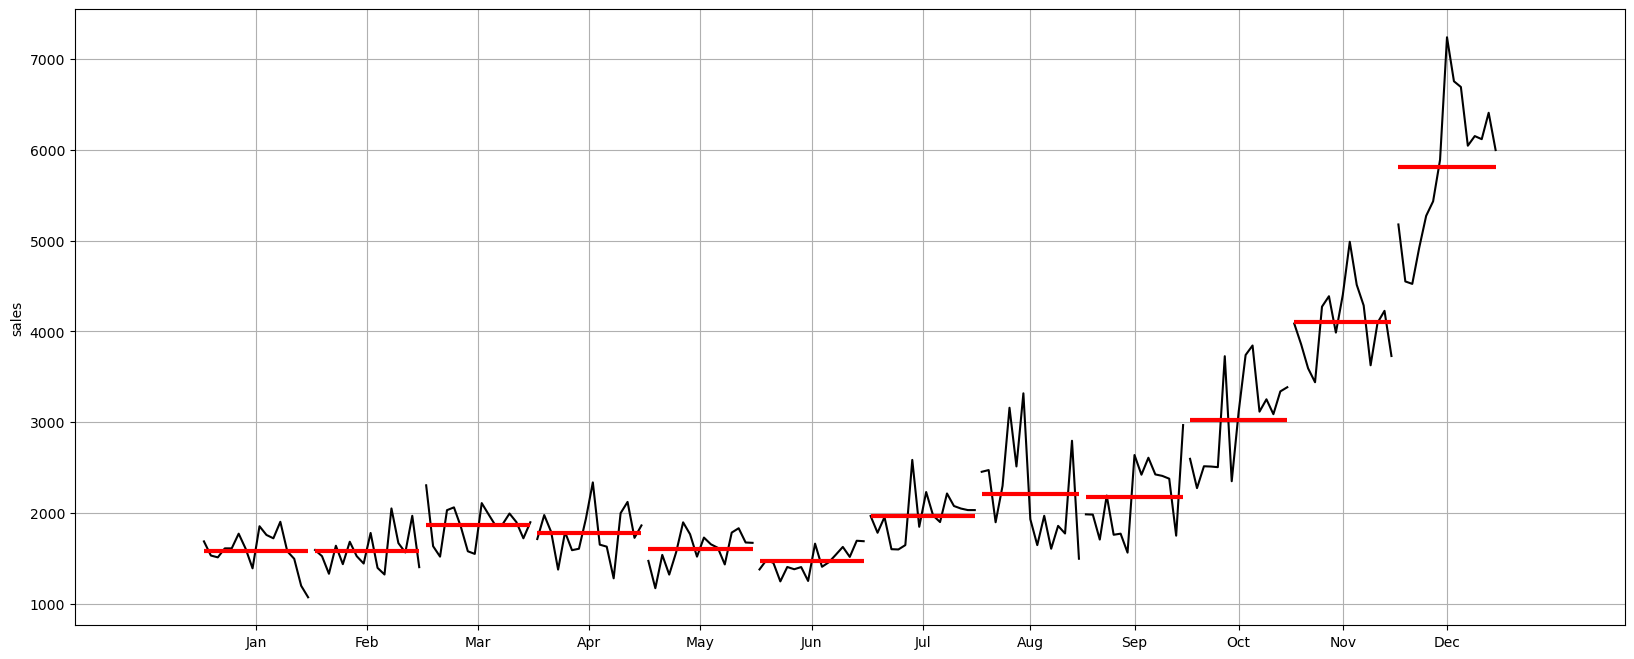

In [17]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data_spa['Sparkling'],ylabel='sales')
plt.grid();


In [18]:

monthly_sales_across_years = pd.pivot_table(data_spa, values = 'Sparkling', columns = data_spa.index.month, index = data_spa.index.year)
monthly_sales_across_years

Year_Month      1       2       3       4       5       6       7       8   \
Year_Month                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Year_Month      9       10      11      12  
Year_Month                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

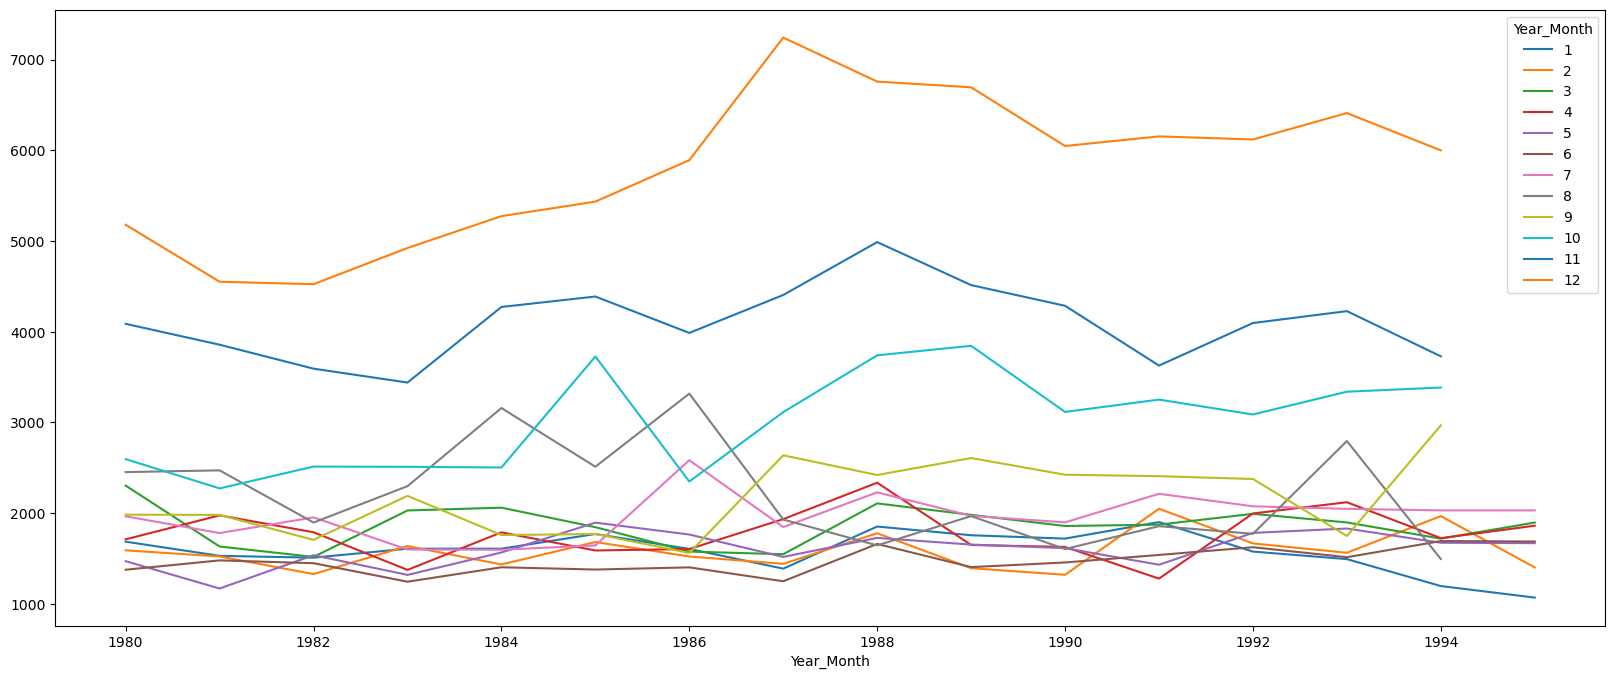

In [19]:
monthly_sales_across_years.plot();

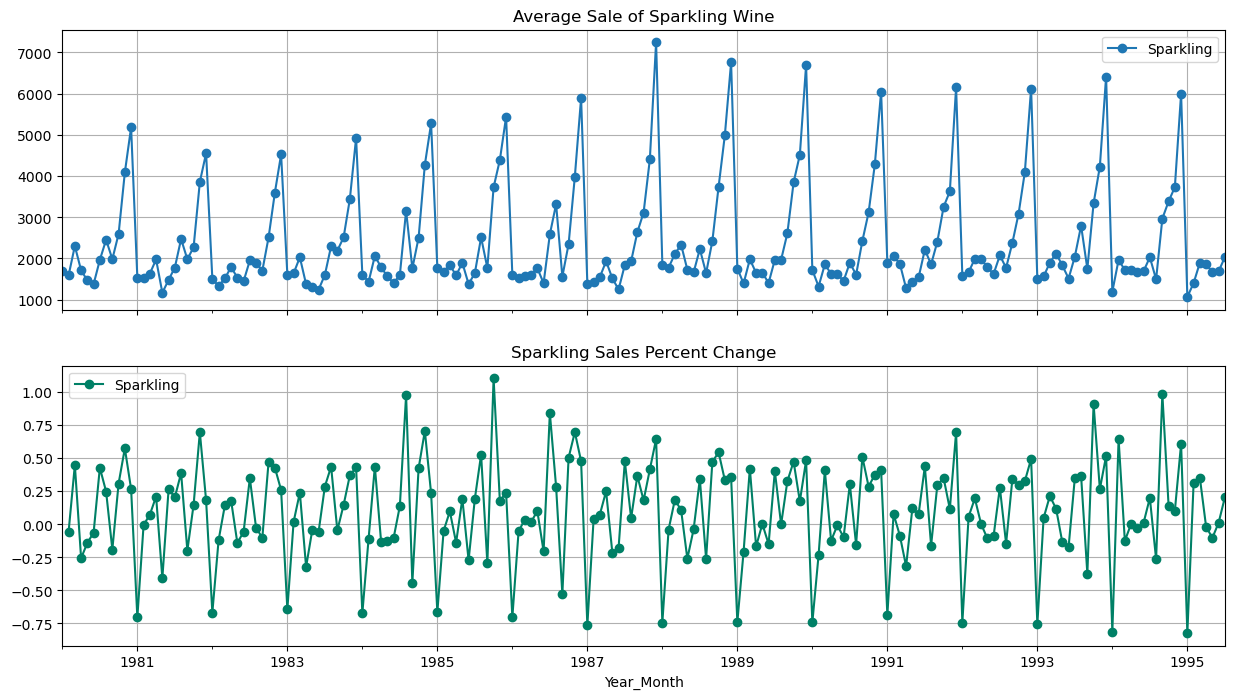

In [20]:

average    = data_spa.groupby(data_spa.index)["Sparkling"].mean()
pct_change = data_spa.groupby(data_spa.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sale of Sparkling Wine",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose


In [19]:
data_spa['YearMonth']  = pd.to_datetime(date_range)

In [20]:
data_spa["Month"] = data_spa["YearMonth"].dt.month
data_spa["Day"] = data_spa["YearMonth"].dt.day
data_spa["Year"] = data_spa["YearMonth"].dt.year

In [21]:
data_spa = data_spa.drop(columns=['YearMonth'])

In [22]:
data_spa

Sparkling  Month  Day  Year
Year_Month                             
1980-01-31       1686      1   31  1980
1980-02-29       1591      2   29  1980
1980-03-31       2304      3   31  1980
1980-04-30       1712      4   30  1980
1980-05-31       1471      5   31  1980
...               ...    ...  ...   ...
1995-03-31       1897      3   31  1995
1995-04-30       1862      4   30  1995
1995-05-31       1670      5   31  1995
1995-06-30       1688      6   30  1995
1995-07-31       2031      7   31  1995

[187 rows x 4 columns]

In [26]:
monthly_average = data_spa.groupby("Month")["Sparkling"].mean()


In [27]:
monthly_average

Month
1     1580.000000
2     1581.687500
3     1865.500000
4     1773.062500
5     1601.937500
6     1473.250000
7     1967.125000
8     2211.800000
9     2169.800000
10    3023.533333
11    4099.800000
12    5813.133333
Name: Sparkling, dtype: float64

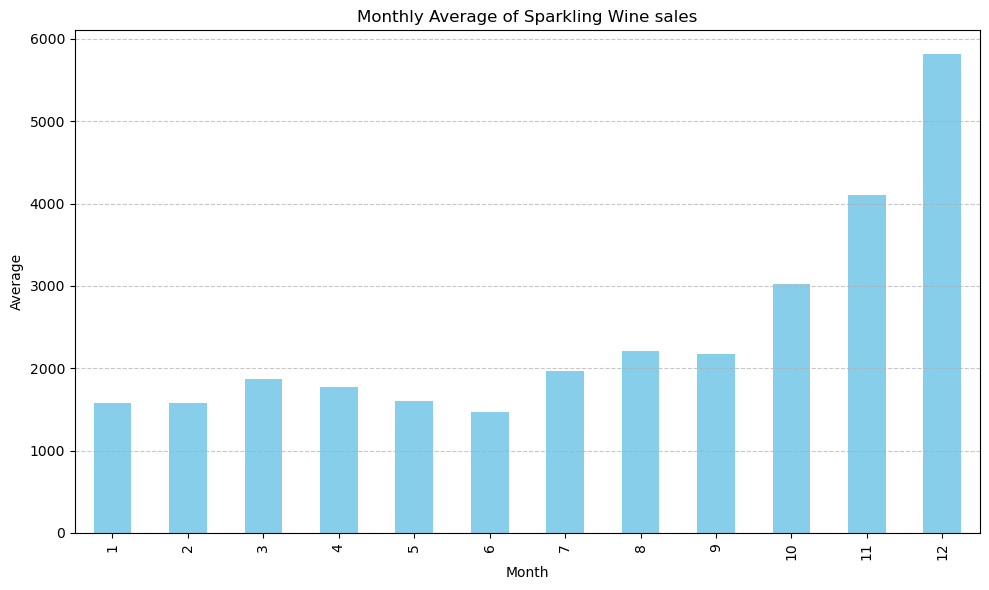

In [28]:
plt.figure(figsize=(10, 6))
monthly_average.plot(kind='bar', color='skyblue')
plt.title('Monthly Average of Sparkling Wine sales')
plt.xlabel('Month')
plt.ylabel('Average')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
yearly_average = data_spa.groupby("Year")["Sparkling"].mean()

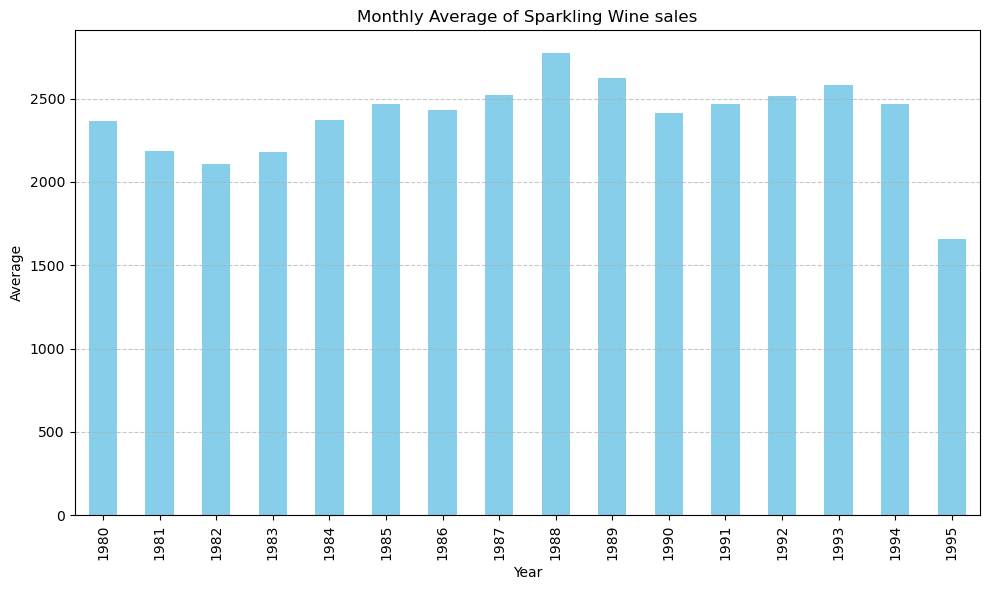

In [30]:
plt.figure(figsize=(10, 6))
yearly_average.plot(kind='bar', color='skyblue')
plt.title('Monthly Average of Sparkling Wine sales')
plt.xlabel('Year')
plt.ylabel('Average')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

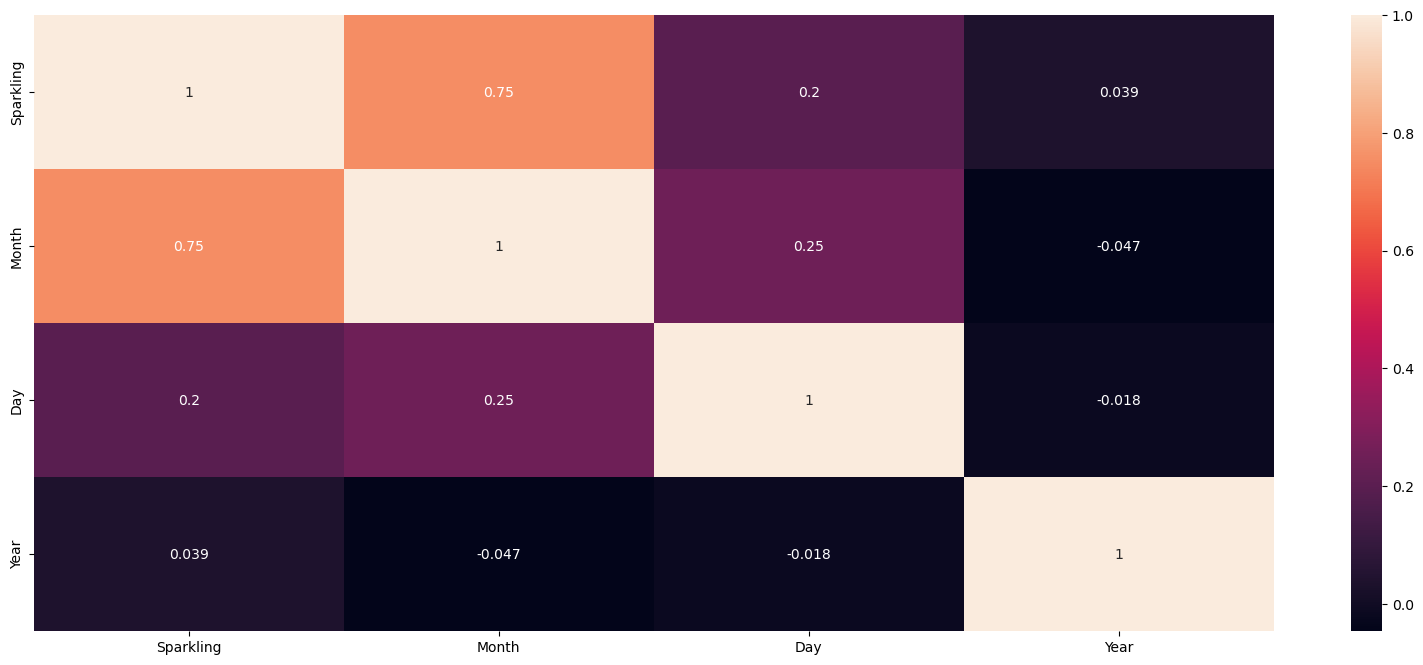

In [25]:
corr_all = data_spa.corr()
mask = np.array(corr_all)
sns.heatmap(corr_all,annot=True);
plt.show()

# Data Pre-processing
- Missing value treatment - Visualize the processed data - Train-test split

In [31]:
data_spa.isna().sum()

Sparkling    0
Month        0
Day          0
Year         0
dtype: int64

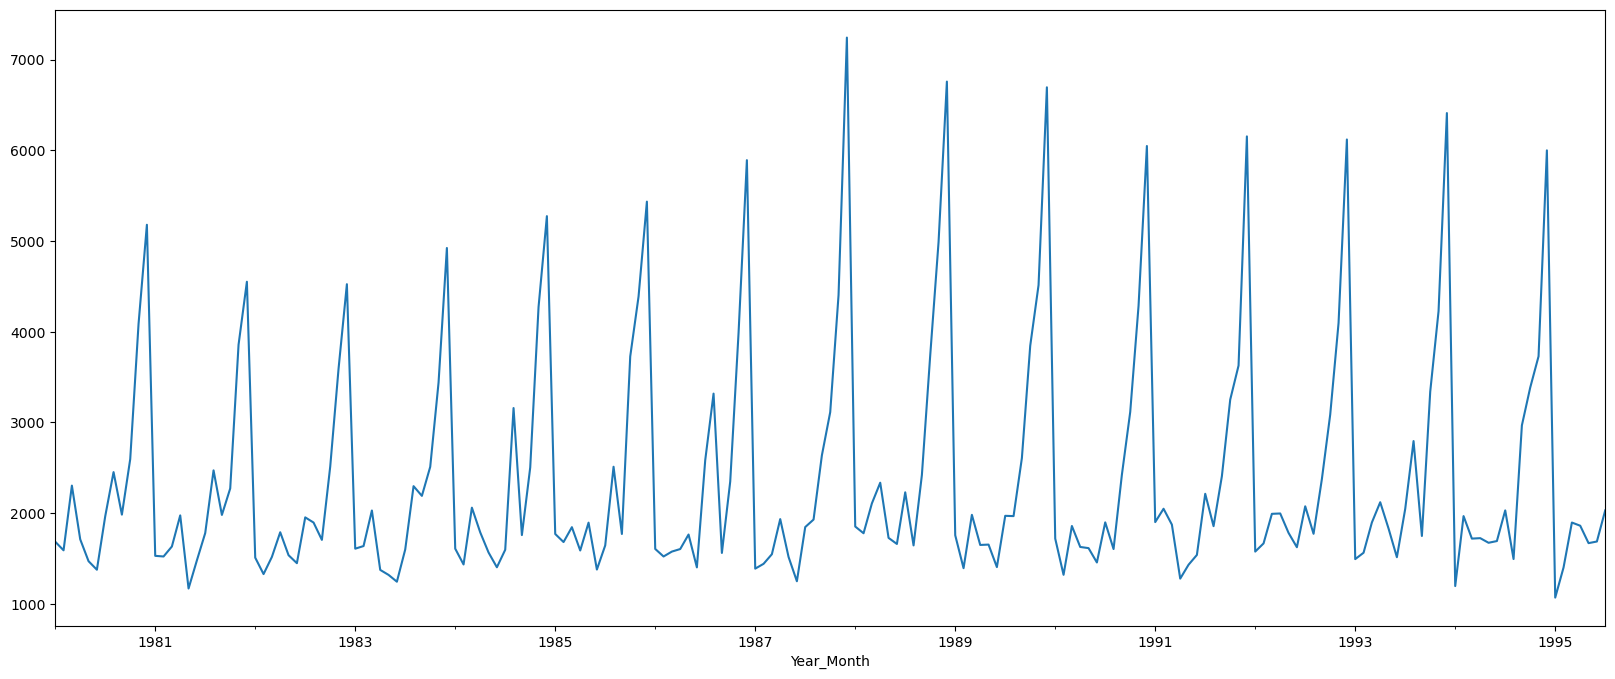

In [32]:
data_spa['Sparkling'].plot();

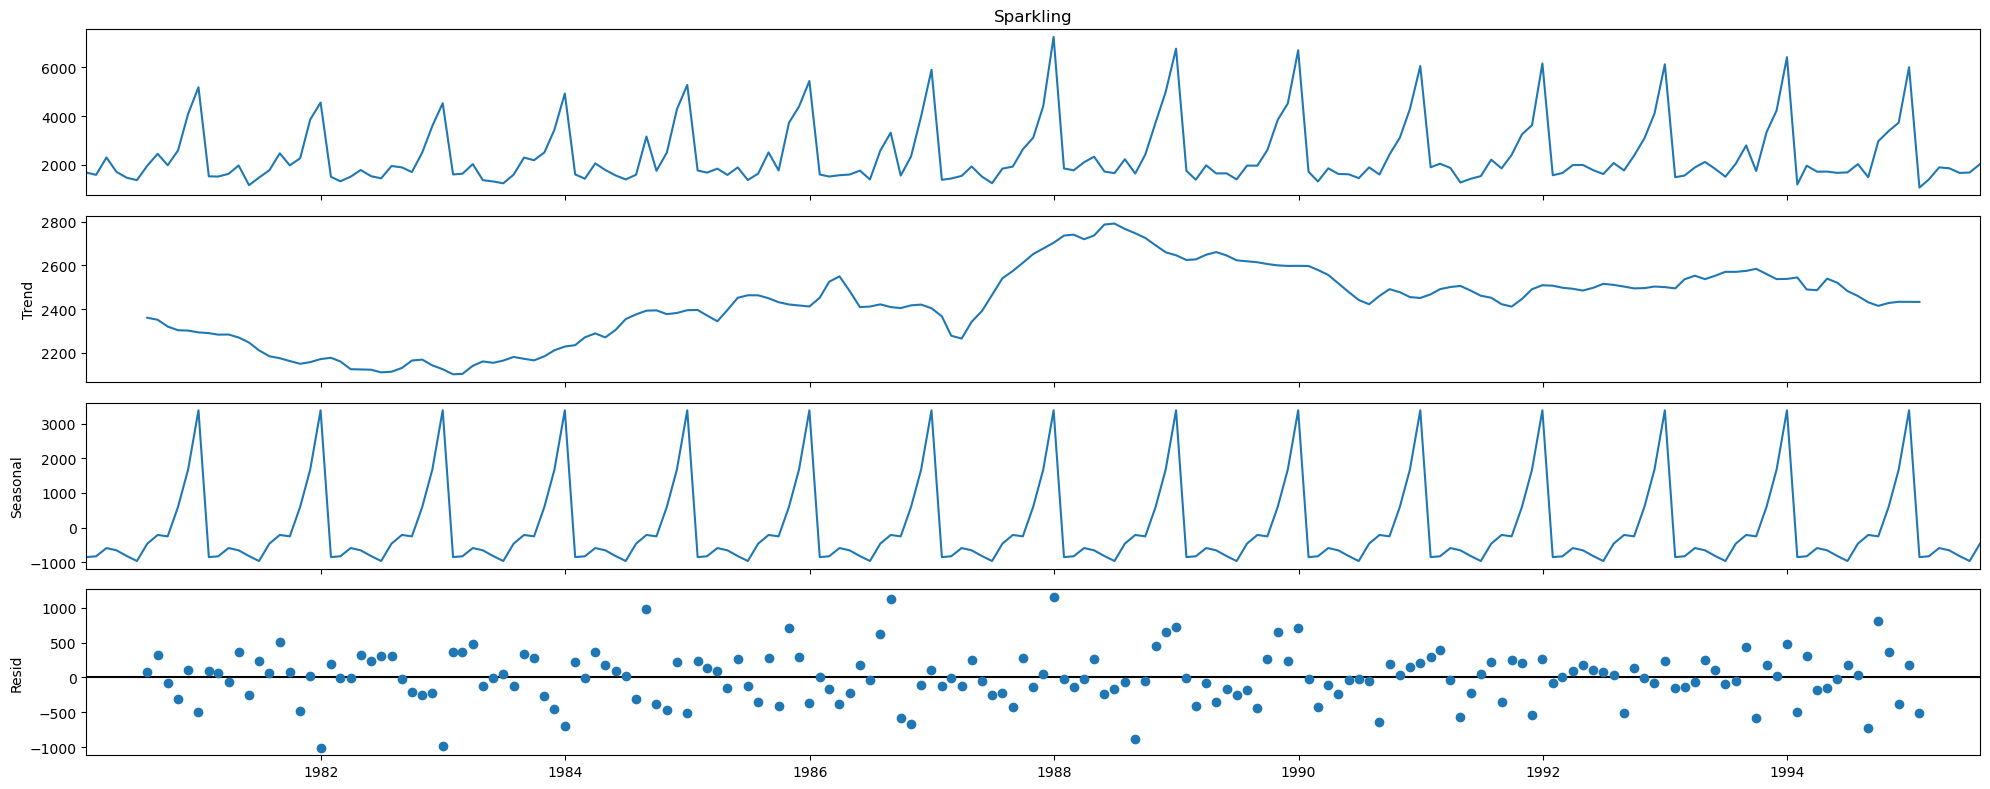

In [33]:
decomposition = seasonal_decompose(data_spa['Sparkling'],model='additive')
decomposition.plot();

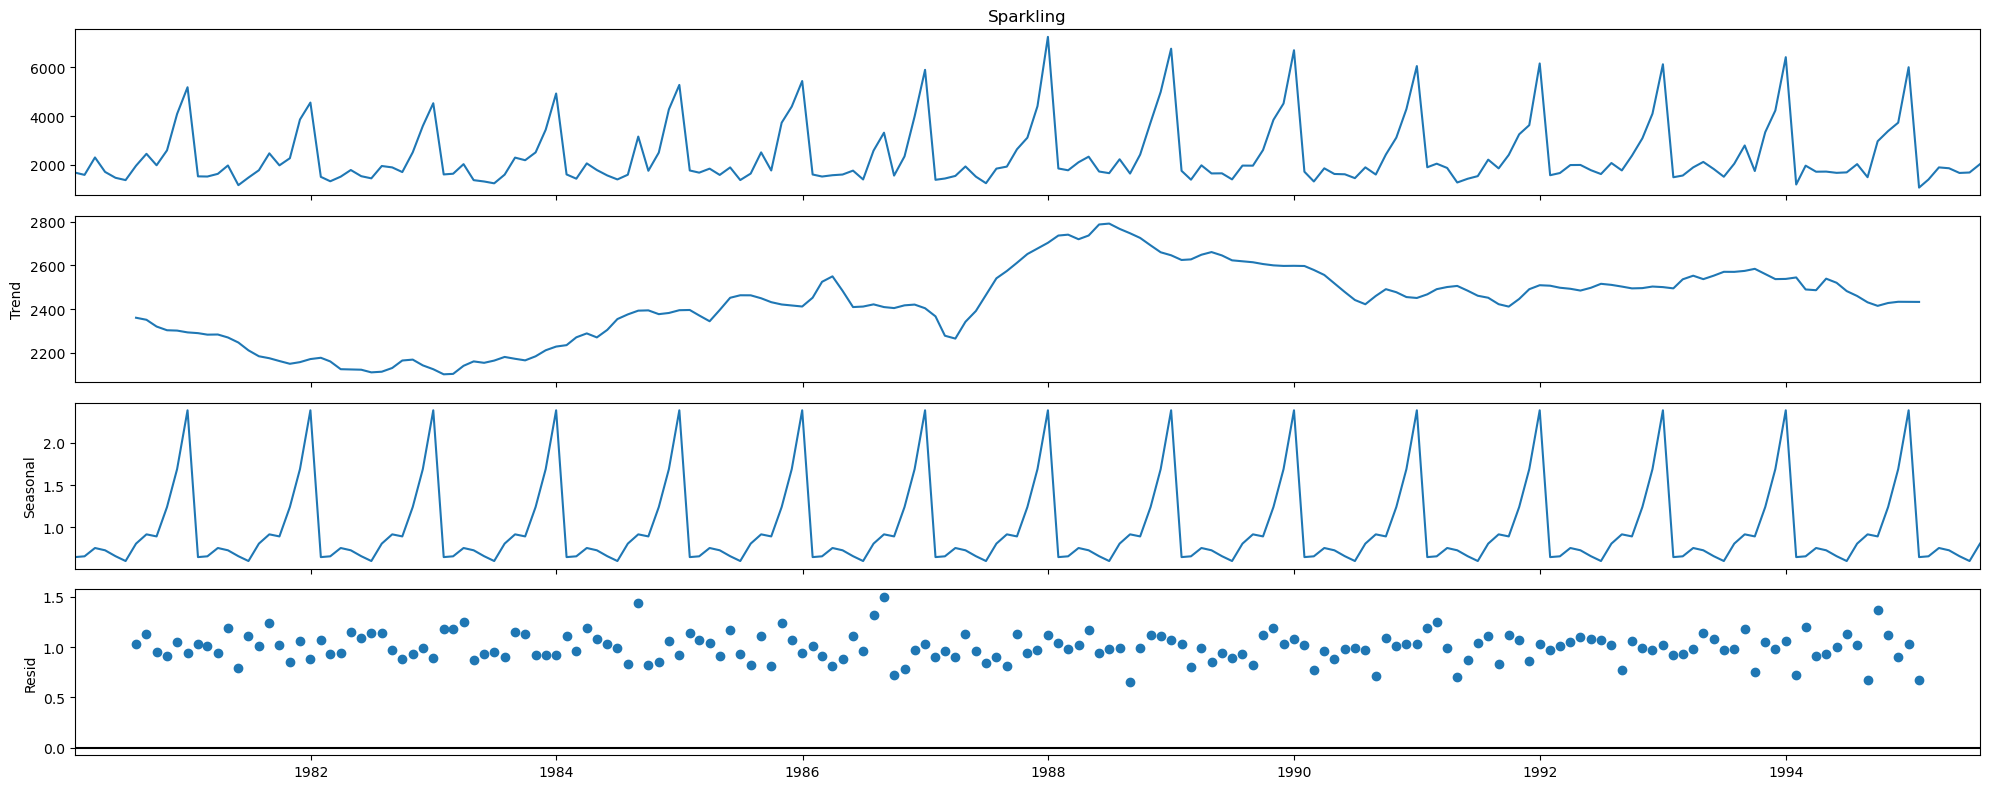

In [34]:
decomposition = seasonal_decompose(data_spa['Sparkling'],model='multiplicative')
decomposition.plot();

In [35]:
split_index = int(len(data_spa) * 0.7)

In [36]:
train_Sparkling = data_spa.iloc[:split_index]

In [37]:
train_Sparkling

Sparkling  Month  Day  Year
Year_Month                             
1980-01-31       1686      1   31  1980
1980-02-29       1591      2   29  1980
1980-03-31       2304      3   31  1980
1980-04-30       1712      4   30  1980
1980-05-31       1471      5   31  1980
...               ...    ...  ...   ...
1990-06-30       1457      6   30  1990
1990-07-31       1899      7   31  1990
1990-08-31       1605      8   31  1990
1990-09-30       2424      9   30  1990
1990-10-31       3116     10   31  1990

[130 rows x 4 columns]

In [38]:
test_Sparkling = data_spa.iloc[split_index:]

In [39]:
print(len(train_Sparkling))
print(len(test_Sparkling))

130
57


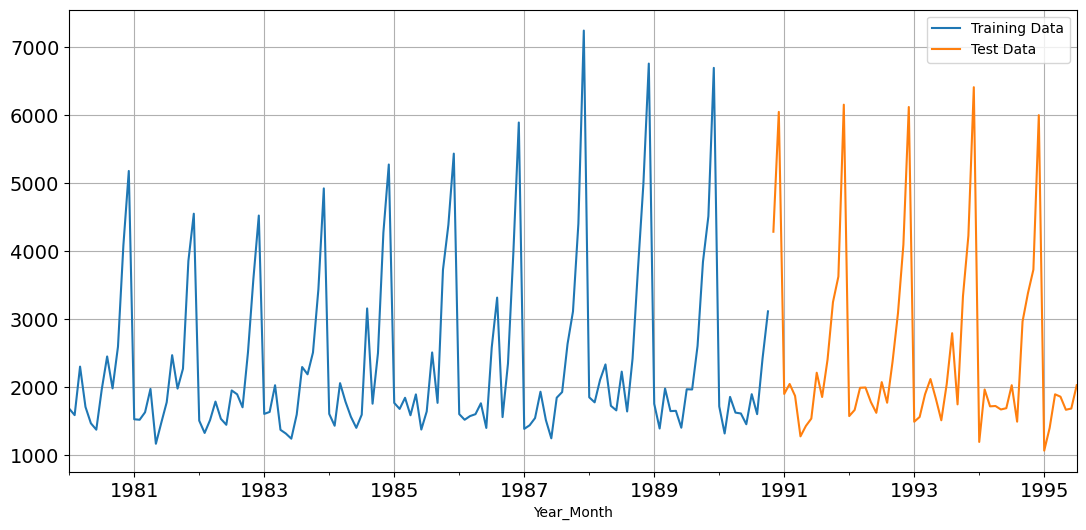

In [40]:
train_Sparkling['Sparkling'].plot(figsize=(13,6), fontsize=14)
test_Sparkling['Sparkling'].plot(figsize=(13,6), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()                           

# Model Building - Original Data
- Build forecasting models - Linear regression - Simple Average - Moving Average - Exponential Models (Single, Double, Triple) - Check the performance of the models built

# Linear Regression

In [41]:
train_time = [i+1 for i in range(len(train_Sparkling))]
test_time = [i+131 for i in range(len(test_Sparkling))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [42]:
LinearRegression_train_Sparkling = train_Sparkling.copy()
LinearRegression_test_Sparkling = test_Sparkling.copy()

In [43]:
LinearRegression_train_Sparkling['time'] = train_time
LinearRegression_test_Sparkling['time'] = test_time

In [44]:
print('First few rows of Training Data')
display(LinearRegression_train_Sparkling.head())
print('Last few rows of Training Data')
display(LinearRegression_train_Sparkling.tail())
print('First few rows of Test Data')
display(LinearRegression_test_Sparkling.head())
print('Last few rows of Test Data')
display(LinearRegression_test_Sparkling.tail())

First few rows of Training Data


Sparkling  Month  Day  Year  time
Year_Month                                   
1980-01-31       1686      1   31  1980     1
1980-02-29       1591      2   29  1980     2
1980-03-31       2304      3   31  1980     3
1980-04-30       1712      4   30  1980     4
1980-05-31       1471      5   31  1980     5

Last few rows of Training Data


Sparkling  Month  Day  Year  time
Year_Month                                   
1990-06-30       1457      6   30  1990   126
1990-07-31       1899      7   31  1990   127
1990-08-31       1605      8   31  1990   128
1990-09-30       2424      9   30  1990   129
1990-10-31       3116     10   31  1990   130

First few rows of Test Data


Sparkling  Month  Day  Year  time
Year_Month                                   
1990-11-30       4286     11   30  1990   131
1990-12-31       6047     12   31  1990   132
1991-01-31       1902      1   31  1991   133
1991-02-28       2049      2   28  1991   134
1991-03-31       1874      3   31  1991   135

Last few rows of Test Data


Sparkling  Month  Day  Year  time
Year_Month                                   
1995-03-31       1897      3   31  1995   183
1995-04-30       1862      4   30  1995   184
1995-05-31       1670      5   31  1995   185
1995-06-30       1688      6   30  1995   186
1995-07-31       2031      7   31  1995   187

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(LinearRegression_train_Sparkling[['time']],LinearRegression_train_Sparkling['Sparkling'].values)

LinearRegression()

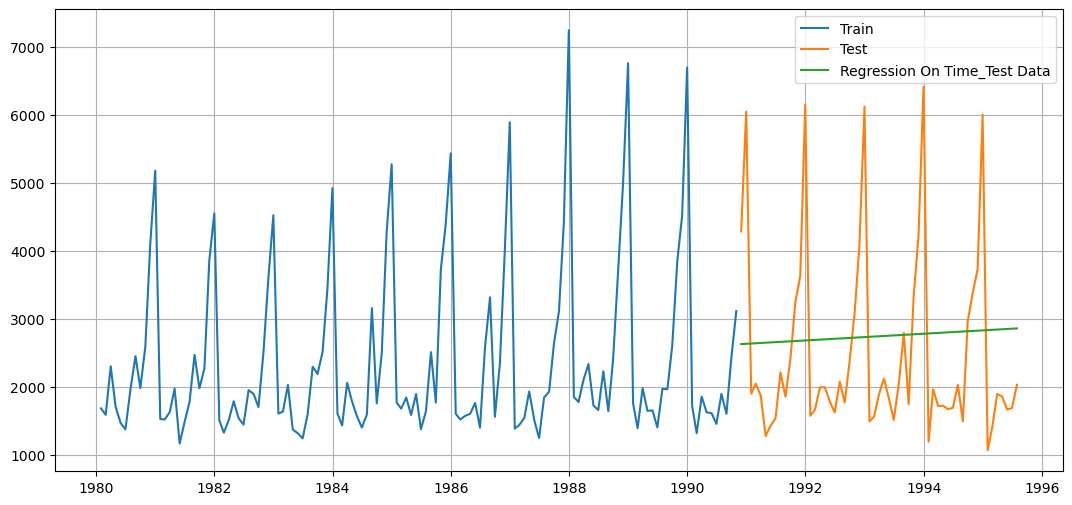

In [47]:
test_predictions_model_linreg  = lr.predict(LinearRegression_test_Sparkling[['time']])
LinearRegression_test_Sparkling['Regressionresult'] = test_predictions_model_linreg

plt.figure(figsize=(13,6))
plt.plot( train_Sparkling['Sparkling'], label='Train')
plt.plot(test_Sparkling['Sparkling'], label='Test')
plt.plot(LinearRegression_test_Sparkling['Regressionresult'] , label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

# Model Evaluation

In [48]:
from sklearn import metrics

In [49]:
rmse_model_test_linreg = metrics.mean_squared_error(test_Sparkling['Sparkling'],test_predictions_model_linreg ,squared=False)
Eval_DF = pd.DataFrame({'Test RMSE': [rmse_model_test_linreg ]},index=['Linear Regression'])
Eval_DF

Test RMSE
Linear Regression  1392.438305

# Method 2 - Simple Average

In [50]:
SimpleAverage_train_Sparkling = train_Sparkling.copy()
SimpleAverage_test_Sparkling = test_Sparkling.copy()

In [51]:
SimpleAverage_test_Sparkling['mean_forecast'] = train_Sparkling['Sparkling'].mean()
SimpleAverage_test_Sparkling.head()

Sparkling  Month  Day  Year  mean_forecast
Year_Month                                            
1990-11-30       4286     11   30  1990    2361.276923
1990-12-31       6047     12   31  1990    2361.276923
1991-01-31       1902      1   31  1991    2361.276923
1991-02-28       2049      2   28  1991    2361.276923
1991-03-31       1874      3   31  1991    2361.276923

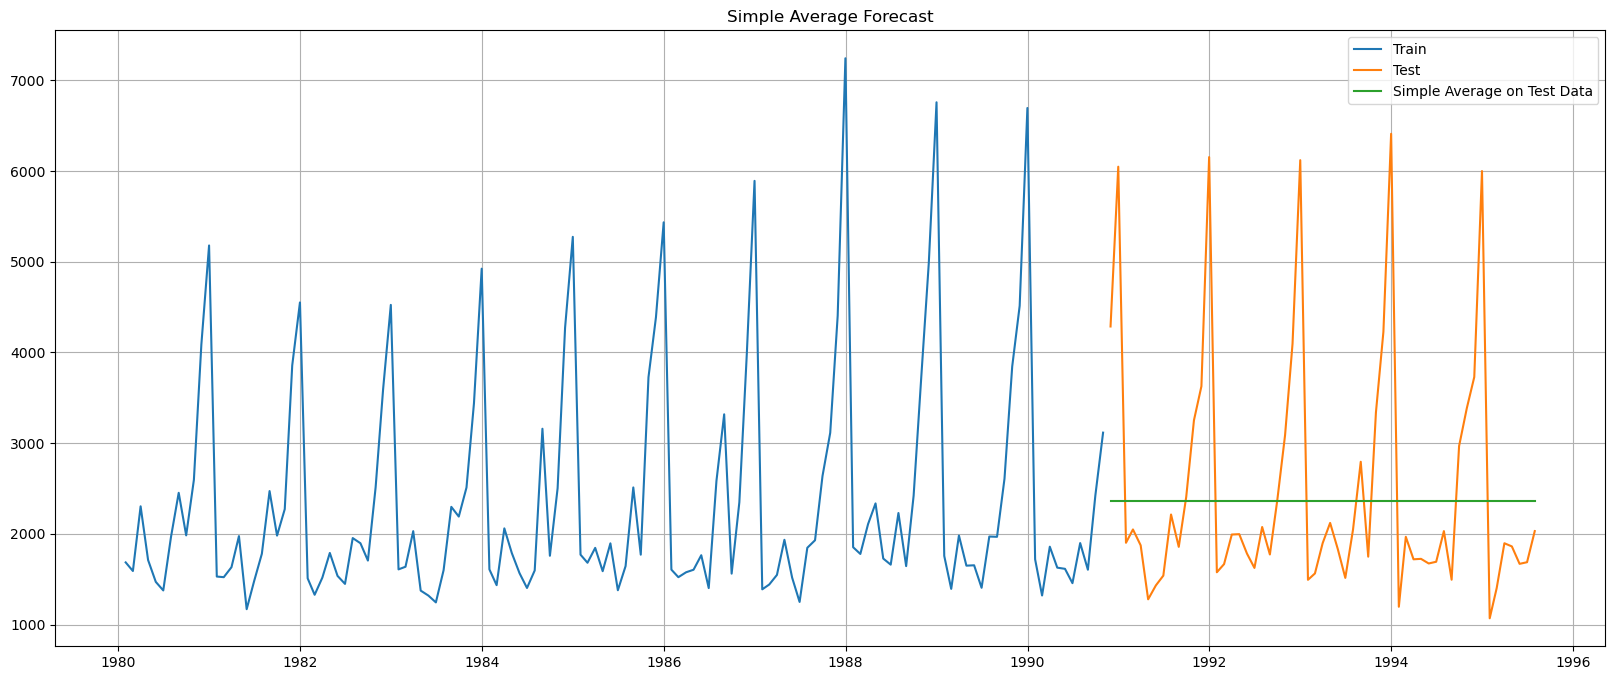

In [52]:
plt.plot(SimpleAverage_train_Sparkling['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_Sparkling['Sparkling'], label='Test')

plt.plot(SimpleAverage_test_Sparkling['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [53]:
rmse_model2_test_SA = metrics.mean_squared_error(test_Sparkling['Sparkling'],SimpleAverage_test_Sparkling['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_SA))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [54]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_SA]}
                           ,index=['SimpleAverageModel'])

Eval_DF = pd.concat([Eval_DF, resultsDf_2])
Eval_DF

Test RMSE
Linear Regression   1392.438305
SimpleAverageModel  1368.746717

# Moving Average

In [55]:
MovingAverage_Sparkling = data_spa.copy()
MovingAverage_Sparkling.head()

Sparkling  Month  Day  Year
Year_Month                             
1980-01-31       1686      1   31  1980
1980-02-29       1591      2   29  1980
1980-03-31       2304      3   31  1980
1980-04-30       1712      4   30  1980
1980-05-31       1471      5   31  1980

In [56]:
MovingAverage_Sparkling['Trailing_2'] = MovingAverage_Sparkling['Sparkling'].rolling(2).mean()
MovingAverage_Sparkling['Trailing_4'] = MovingAverage_Sparkling['Sparkling'].rolling(4).mean()
MovingAverage_Sparkling['Trailing_6'] = MovingAverage_Sparkling['Sparkling'].rolling(6).mean()
MovingAverage_Sparkling['Trailing_9'] = MovingAverage_Sparkling['Sparkling'].rolling(9).mean()


In [57]:
MovingAverage_Sparkling.head()

Sparkling  Month  Day  Year  Trailing_2  Trailing_4  Trailing_6  \
Year_Month                                                                    
1980-01-31       1686      1   31  1980         NaN         NaN         NaN   
1980-02-29       1591      2   29  1980      1638.5         NaN         NaN   
1980-03-31       2304      3   31  1980      1947.5         NaN         NaN   
1980-04-30       1712      4   30  1980      2008.0     1823.25         NaN   
1980-05-31       1471      5   31  1980      1591.5     1769.50         NaN   

            Trailing_9  
Year_Month              
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

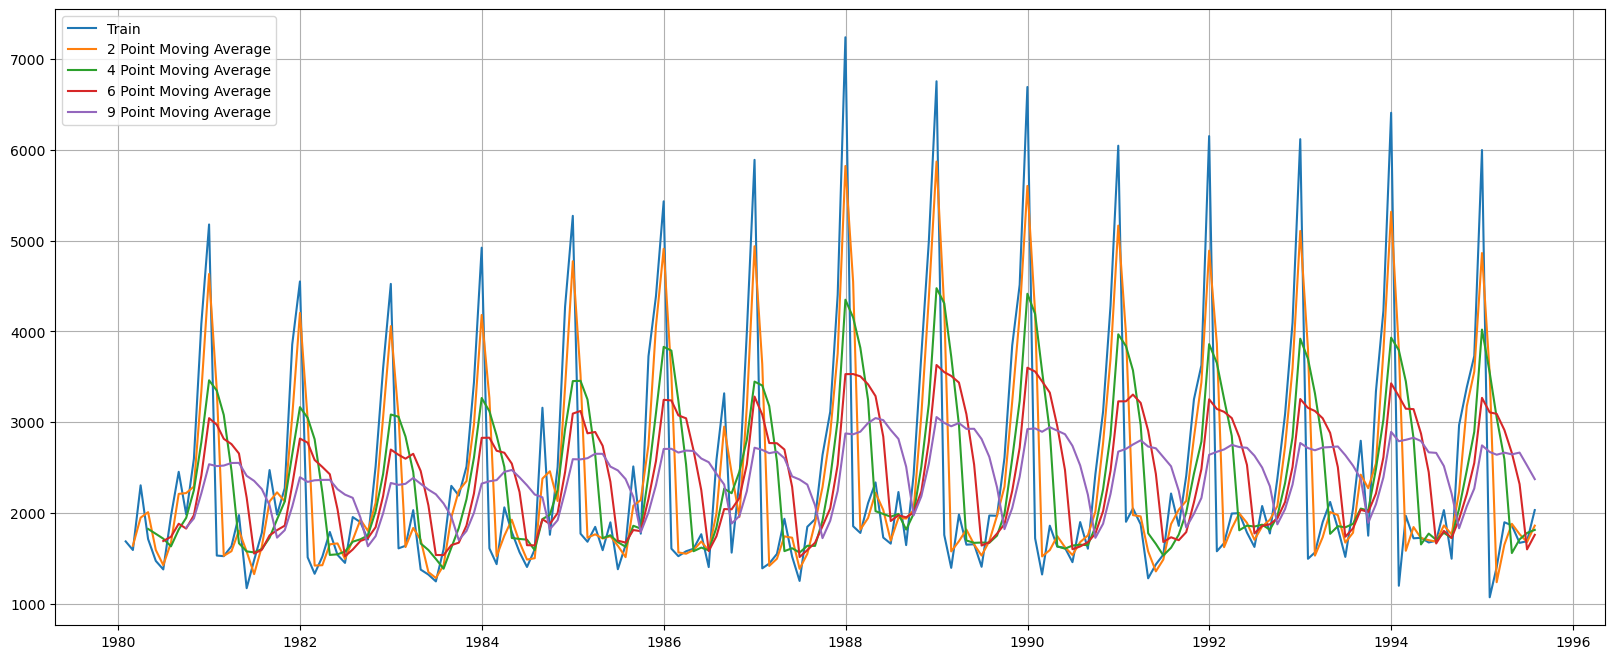

In [58]:


plt.plot(MovingAverage_Sparkling['Sparkling'], label='Train')
plt.plot(MovingAverage_Sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_Sparkling['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [59]:
trailing_MovingAverage_train_Sparkling=MovingAverage_Sparkling[0:int(len(MovingAverage_Sparkling)*0.7)] 
trailing_MovingAverage_test_Sparkling=MovingAverage_Sparkling[int(len(MovingAverage_Sparkling)*0.7):]

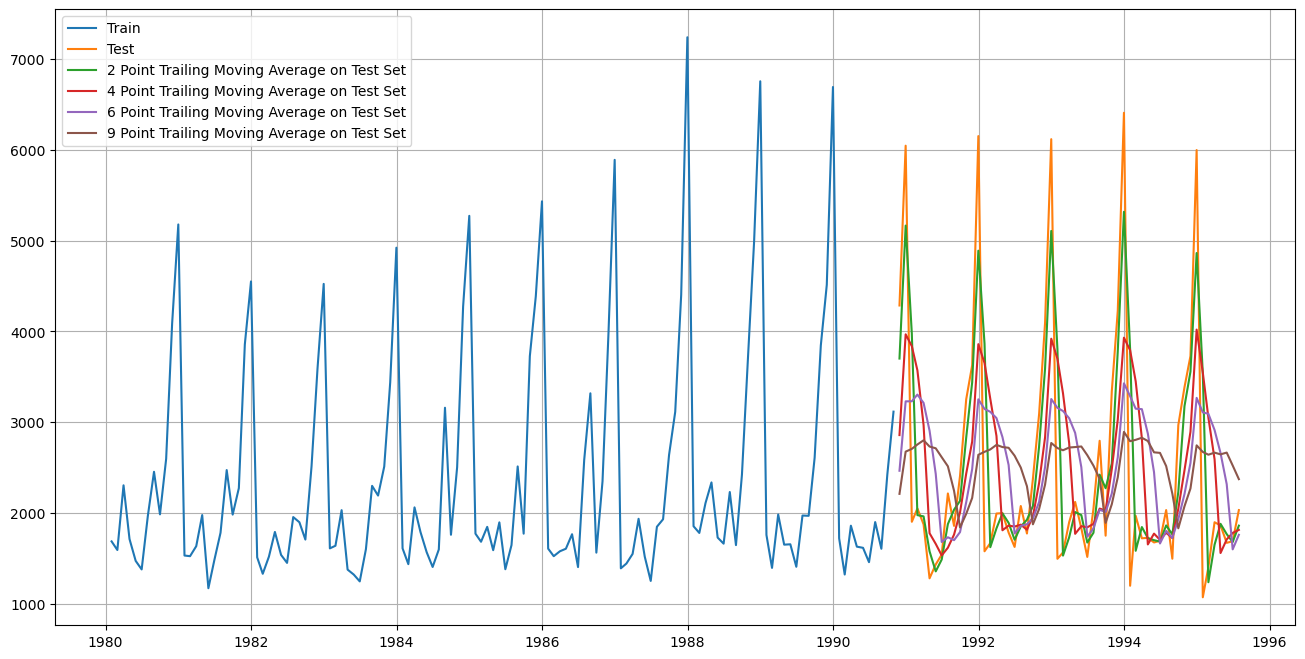

In [60]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_Sparkling['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_Sparkling['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_Sparkling['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [61]:
rmse_model3_test_2 = metrics.mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_2))
rmse_model3_test_4 = metrics.mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_4))
rmse_model3_test_6 = metrics.mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_6))
rmse_model3_test_9 = metrics.mean_squared_error(test_Sparkling['Sparkling'],trailing_MovingAverage_test_Sparkling['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model3_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [62]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_2,rmse_model3_test_4
                                          ,rmse_model3_test_6,rmse_model3_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

Eval_DF = pd.concat([Eval_DF, resultsDf_3])
Eval_DF

Test RMSE
Linear Regression            1392.438305
SimpleAverageModel           1368.746717
2pointTrailingMovingAverage   811.178937
4pointTrailingMovingAverage  1184.213295
6pointTrailingMovingAverage  1337.200524
9pointTrailingMovingAverage  1422.653281

# Method 4: Simple Exponential Smoothing

In [63]:
SES_train_Sparkling = train_Sparkling.copy()
SES_test_Sparkling = test_Sparkling.copy()

In [64]:
from   statsmodels.tsa.api  import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
model_SES = SimpleExpSmoothing(SES_train_Sparkling['Sparkling'])

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [66]:
model_SES_autofit = model_SES.fit(optimized=True)


In [67]:
model_SES_autofit.params

{'smoothing_level': 0.03753429941744519,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
SES_predict_Sparkling = model_SES_autofit.forecast(steps=len(test_Sparkling))
SES_predict_Sparkling

1990-11-30    2465.235699
1990-12-31    2465.235699
1991-01-31    2465.235699
1991-02-28    2465.235699
1991-03-31    2465.235699
1991-04-30    2465.235699
1991-05-31    2465.235699
1991-06-30    2465.235699
1991-07-31    2465.235699
1991-08-31    2465.235699
1991-09-30    2465.235699
1991-10-31    2465.235699
1991-11-30    2465.235699
1991-12-31    2465.235699
1992-01-31    2465.235699
1992-02-29    2465.235699
1992-03-31    2465.235699
1992-04-30    2465.235699
1992-05-31    2465.235699
1992-06-30    2465.235699
1992-07-31    2465.235699
1992-08-31    2465.235699
1992-09-30    2465.235699
1992-10-31    2465.235699
1992-11-30    2465.235699
1992-12-31    2465.235699
1993-01-31    2465.235699
1993-02-28    2465.235699
1993-03-31    2465.235699
1993-04-30    2465.235699
1993-05-31    2465.235699
1993-06-30    2465.235699
1993-07-31    2465.235699
1993-08-31    2465.235699
1993-09-30    2465.235699
1993-10-31    2465.235699
1993-11-30    2465.235699
1993-12-31    2465.235699
1994-01-31  

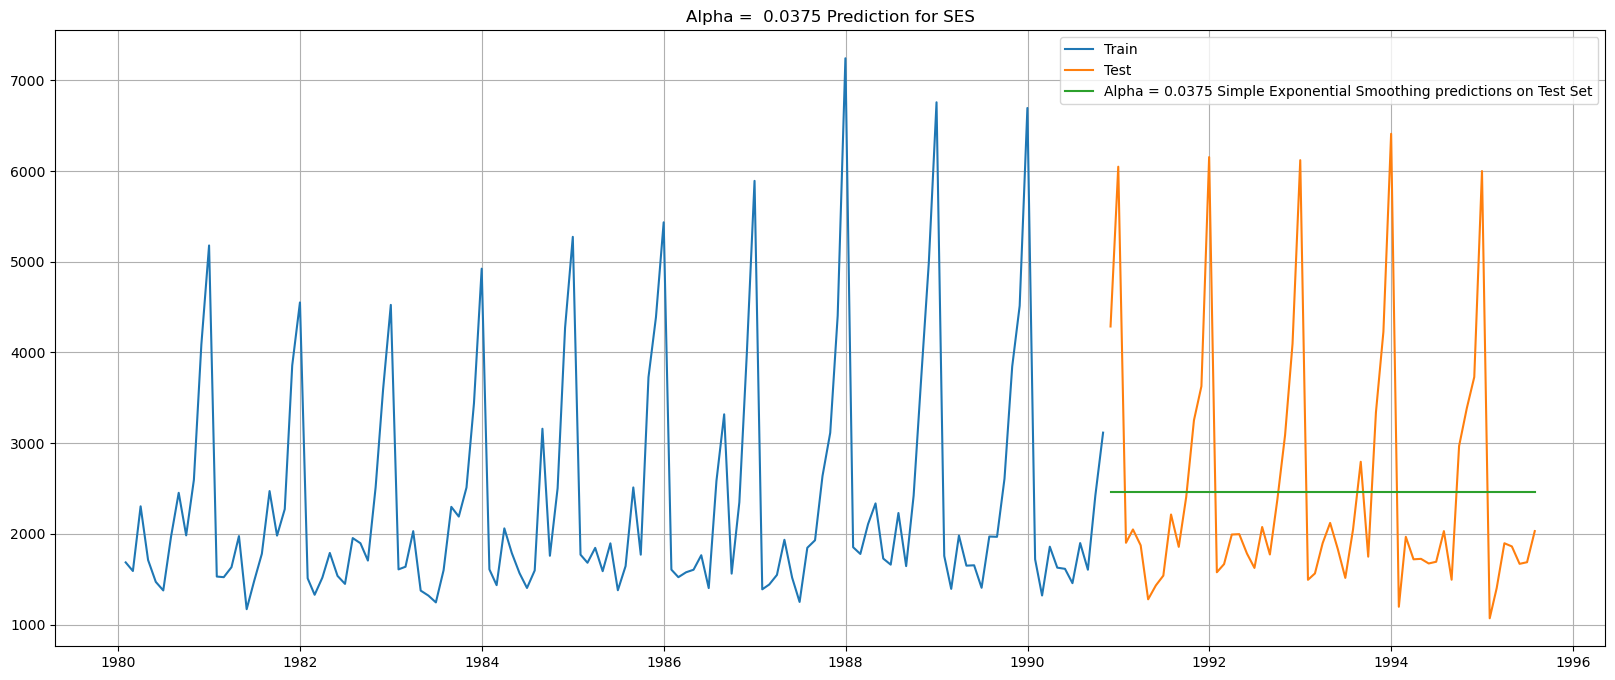

In [69]:

plt.plot(train_Sparkling['Sparkling'], label='Train')
plt.plot(test_Sparkling['Sparkling'], label='Test')

plt.plot(SES_predict_Sparkling, label='Alpha = 0.0375 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =  0.0375 Prediction for SES');

In [70]:
from sklearn.metrics import  mean_squared_error

In [71]:
ses_Sparkling_RSME = mean_squared_error(test_Sparkling['Sparkling'].values,SES_predict_Sparkling.values,squared=False)

In [72]:
print('SES RMSE:',mean_squared_error(test_Sparkling['Sparkling'].values,SES_predict_Sparkling.values,squared=False))

SES RMSE: 1362.428949431271


In [73]:
SES_DF = pd.DataFrame({'Test RMSE': ses_Sparkling_RSME},index=['Alpha=0.0375,Simple Exponentital Smoothing'])

In [74]:
Eval_DF = pd.concat([Eval_DF, SES_DF])
Eval_DF

Test RMSE
Linear Regression                           1392.438305
SimpleAverageModel                          1368.746717
2pointTrailingMovingAverage                  811.178937
4pointTrailingMovingAverage                 1184.213295
6pointTrailingMovingAverage                 1337.200524
9pointTrailingMovingAverage                 1422.653281
Alpha=0.0375,Simple Exponentital Smoothing  1362.428949

# Double Exp smoothing

In [75]:
model_DES_Sparkling = Holt(train_Sparkling['Sparkling'],initialization_method='estimated')

model_DES_Sparkling = model_DES_Sparkling.fit()

print('Double Exp smoothing')
print(model_DES_Sparkling.params)

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Double Exp smoothing
{'smoothing_level': 0.07568138503984535, 'smoothing_trend': 0.07564849865549998, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.5972125731676, 'initial_trend': 6.84852094706126, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
DES_predict_Sparkling =  model_DES_Sparkling.forecast(len(test_Sparkling))
DES_predict_Sparkling

1990-11-30    2409.794433
1990-12-31    2393.482643
1991-01-31    2377.170853
1991-02-28    2360.859063
1991-03-31    2344.547273
1991-04-30    2328.235483
1991-05-31    2311.923693
1991-06-30    2295.611903
1991-07-31    2279.300112
1991-08-31    2262.988322
1991-09-30    2246.676532
1991-10-31    2230.364742
1991-11-30    2214.052952
1991-12-31    2197.741162
1992-01-31    2181.429372
1992-02-29    2165.117582
1992-03-31    2148.805792
1992-04-30    2132.494002
1992-05-31    2116.182212
1992-06-30    2099.870422
1992-07-31    2083.558632
1992-08-31    2067.246842
1992-09-30    2050.935051
1992-10-31    2034.623261
1992-11-30    2018.311471
1992-12-31    2001.999681
1993-01-31    1985.687891
1993-02-28    1969.376101
1993-03-31    1953.064311
1993-04-30    1936.752521
1993-05-31    1920.440731
1993-06-30    1904.128941
1993-07-31    1887.817151
1993-08-31    1871.505361
1993-09-30    1855.193571
1993-10-31    1838.881781
1993-11-30    1822.569990
1993-12-31    1806.258200
1994-01-31  

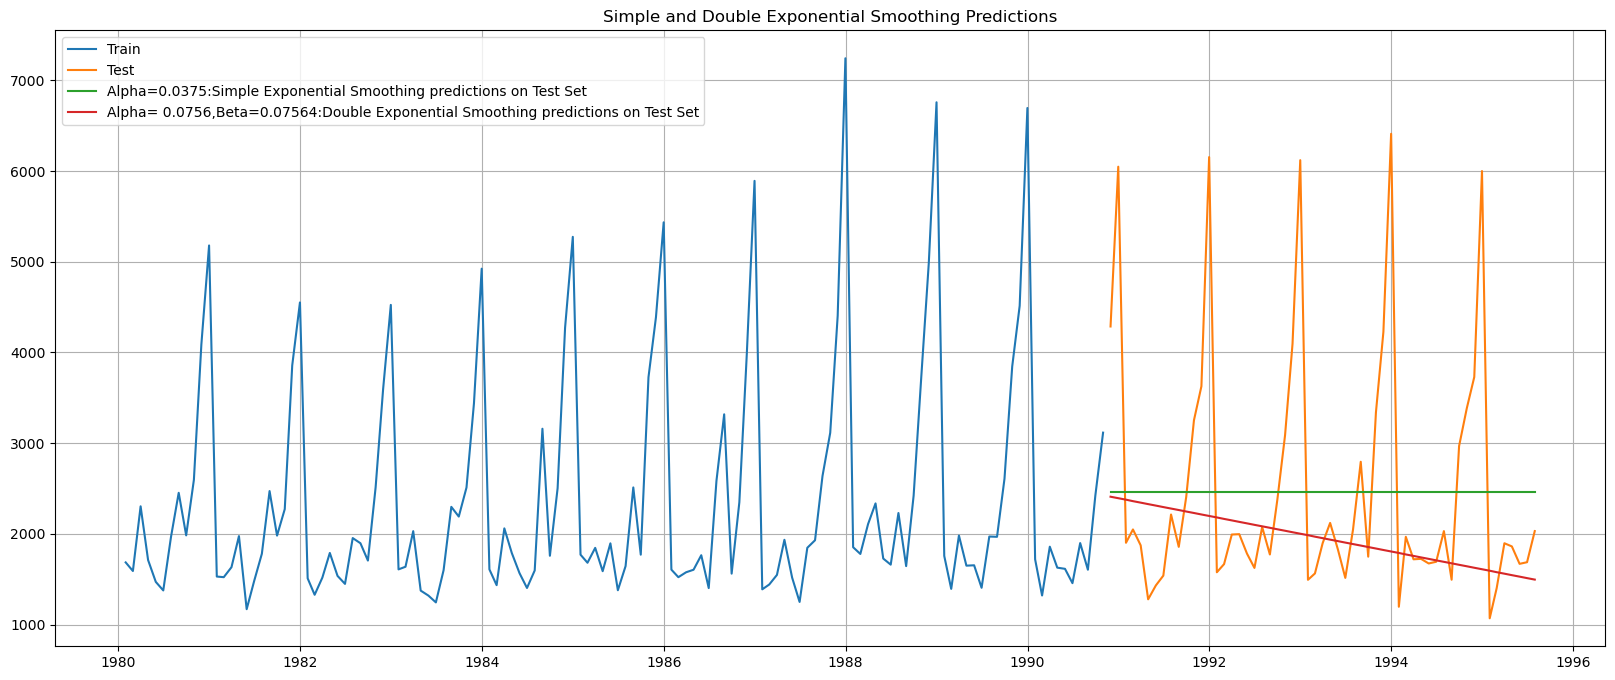

In [77]:
plt.plot(train_Sparkling['Sparkling'], label='Train')
plt.plot(test_Sparkling['Sparkling'], label='Test')

plt.plot(SES_predict_Sparkling, label='Alpha=0.0375:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_Sparkling, label='Alpha= 0.0756,Beta=0.07564:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [78]:
rsme_des = mean_squared_error(test_Sparkling['Sparkling'].values,DES_predict_Sparkling.values,squared=False)

In [79]:
des_df =  pd.DataFrame({'Test RMSE': rsme_des},index=['Alpha=0.0756,Beta=0.07564:Double Exponential Smoothing'])

In [80]:
Eval_DF = pd.concat([Eval_DF, des_df])
Eval_DF

Test RMSE
Linear Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.0375,Simple Exponentital Smoothing          1362.428949
Alpha=0.0756,Beta=0.07564:Double Exponential Sm...  1468.015409

# Triple Exp Smoothing

In [81]:
train_Sparkling_TES = train_Sparkling.copy()
test_Sparkling_TES = test_Sparkling.copy()

In [82]:
model_tes_ta_sa = ExponentialSmoothing(train_Sparkling_TES['Sparkling'],trend='additive',seasonal='additive')
model_tes_ta_sm = ExponentialSmoothing(train_Sparkling_TES['Sparkling'],trend='additive',seasonal='multiplicative')
model_tes_tm_sm = ExponentialSmoothing(train_Sparkling_TES['Sparkling'],trend='multiplicative',seasonal='multiplicative')
model_tes_tm_sa = ExponentialSmoothing(train_Sparkling_TES['Sparkling'],trend='multiplicative',seasonal='additive')

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [83]:
model_tes_fit_ta_sa = model_tes_ta_sa.fit(optimized=True)
model_tes_fit_ta_sm = model_tes_ta_sm.fit(optimized=True)
model_tes_fit_tm_sm = model_tes_tm_sm.fit(optimized=True)
model_tes_fit_tm_sa = model_tes_tm_sa.fit(optimized=True)

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [84]:
results_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[]})

In [85]:
test_Sparkling_TES['predict_ta_sa'] =model_tes_fit_ta_sa.forecast(len(test_Sparkling_TES))
test_Sparkling_TES['predict_ta_sm']=model_tes_fit_ta_sm.forecast(len(test_Sparkling_TES))
test_Sparkling_TES['predict_tm_sm']=model_tes_fit_tm_sm.forecast(len(test_Sparkling_TES))
test_Sparkling_TES['predict_tm_sa']=model_tes_fit_tm_sa.forecast(len(test_Sparkling_TES))

In [86]:
rsme_ta_sa = mean_squared_error(test_Sparkling_TES['Sparkling'].values,test_Sparkling_TES['predict_ta_sa'].values,squared=False)
rsme_ta_sm = mean_squared_error(test_Sparkling_TES['Sparkling'].values,test_Sparkling_TES['predict_ta_sm'].values,squared=False)
rsme_tm_sm = mean_squared_error(test_Sparkling_TES['Sparkling'].values,test_Sparkling_TES['predict_tm_sm'].values,squared=False)
rsme_tm_sa = mean_squared_error(test_Sparkling_TES['Sparkling'].values,test_Sparkling_TES['predict_tm_sa'].values,squared=False)


In [87]:
model_tes_fit_ta_sa.params

{'smoothing_level': 0.06871144338895409,
 'smoothing_trend': 0.026504879393175,
 'smoothing_seasonal': 0.5279825493698512,
 'damping_trend': nan,
 'initial_level': 2318.8465265203367,
 'initial_trend': -0.22585722041700507,
 'initial_seasons': array([-694.21346809, -768.46706141, -292.04002651, -517.63405066,
        -880.56455792, -884.72649017, -399.20282583,  128.67427419,
        -329.04495616,  240.07356474, 1673.52542837, 2686.01941002]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
model_tes_fit_ta_sm.params

{'smoothing_level': 0.07571477801793038,
 'smoothing_trend': 0.06489837777631828,
 'smoothing_seasonal': 0.37656051925177914,
 'damping_trend': nan,
 'initial_level': 2356.5416785046673,
 'initial_trend': -9.18196615119017,
 'initial_seasons': array([0.71187753, 0.6780014 , 0.89663441, 0.79726712, 0.64132661,
        0.64049937, 0.86770501, 1.1135006 , 0.89813412, 1.18645545,
        1.83481782, 2.32894849]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [89]:
model_tes_fit_tm_sm.params

{'smoothing_level': 0.07571457746912458,
 'smoothing_trend': 0.06489820627226882,
 'smoothing_seasonal': 0.34232818093105255,
 'damping_trend': nan,
 'initial_level': 2356.5418133612025,
 'initial_trend': 0.9982024127829187,
 'initial_seasons': array([0.72641685, 0.69424512, 0.88623965, 0.80302639, 0.66503063,
        0.66310309, 0.86345887, 1.09775031, 0.89263033, 1.17176603,
        1.82693251, 2.3414606 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
model_tes_fit_tm_sa.params

{'smoothing_level': 0.07528937688423813,
 'smoothing_trend': 0.02139052926145005,
 'smoothing_seasonal': 0.4767887396017454,
 'damping_trend': nan,
 'initial_level': 2356.1388365416065,
 'initial_trend': 1.0011096906638568,
 'initial_seasons': array([-636.98513585, -723.57370644, -397.00833035, -473.97610969,
        -809.36876692, -816.24327363, -384.31209828,   73.94285009,
        -238.64823104,  272.0019843 , 1543.43629559, 2591.63871244]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
tes_ta_sa = pd.DataFrame({'Test RMSE': rsme_ta_sa },index=['Alpha= 0.0687,Beta=0.0265,Gamma = 0.5279:TES_TA_SA '])
tes_ta_sm = pd.DataFrame({'Test RMSE': rsme_ta_sm },index=['Alpha= 0.0757,Beta=0.0648,Gamma = 0.3765:TES_TA_SM '])
tes_tm_sm = pd.DataFrame({'Test RMSE': rsme_tm_sm },index=['Alpha= 0.0757,Beta=0.0648,Gamma = 0.3423:TES_TM_SM '])
tes_tm_sa = pd.DataFrame({'Test RMSE': rsme_tm_sa },index=['Alpha= 0.0752,Beta=0.02139,Gamma = 0.4767:TES_TM_SA '])


In [92]:
Eval_DF = pd.concat([Eval_DF, tes_ta_sa ,tes_ta_sm, tes_tm_sm,tes_tm_sa])
Eval_DF

Test RMSE
Linear Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.0375,Simple Exponentital Smoothing          1362.428949
Alpha=0.0756,Beta=0.07564:Double Exponential Sm...  1468.015409
Alpha= 0.0687,Beta=0.0265,Gamma = 0.5279:TES_TA...   377.435453
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3765:TES_TA...   381.656873
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3423:TES_TM...   362.826050
Alpha= 0.0752,Beta=0.02139,Gamma = 0.4767:TES_T...   369.484818

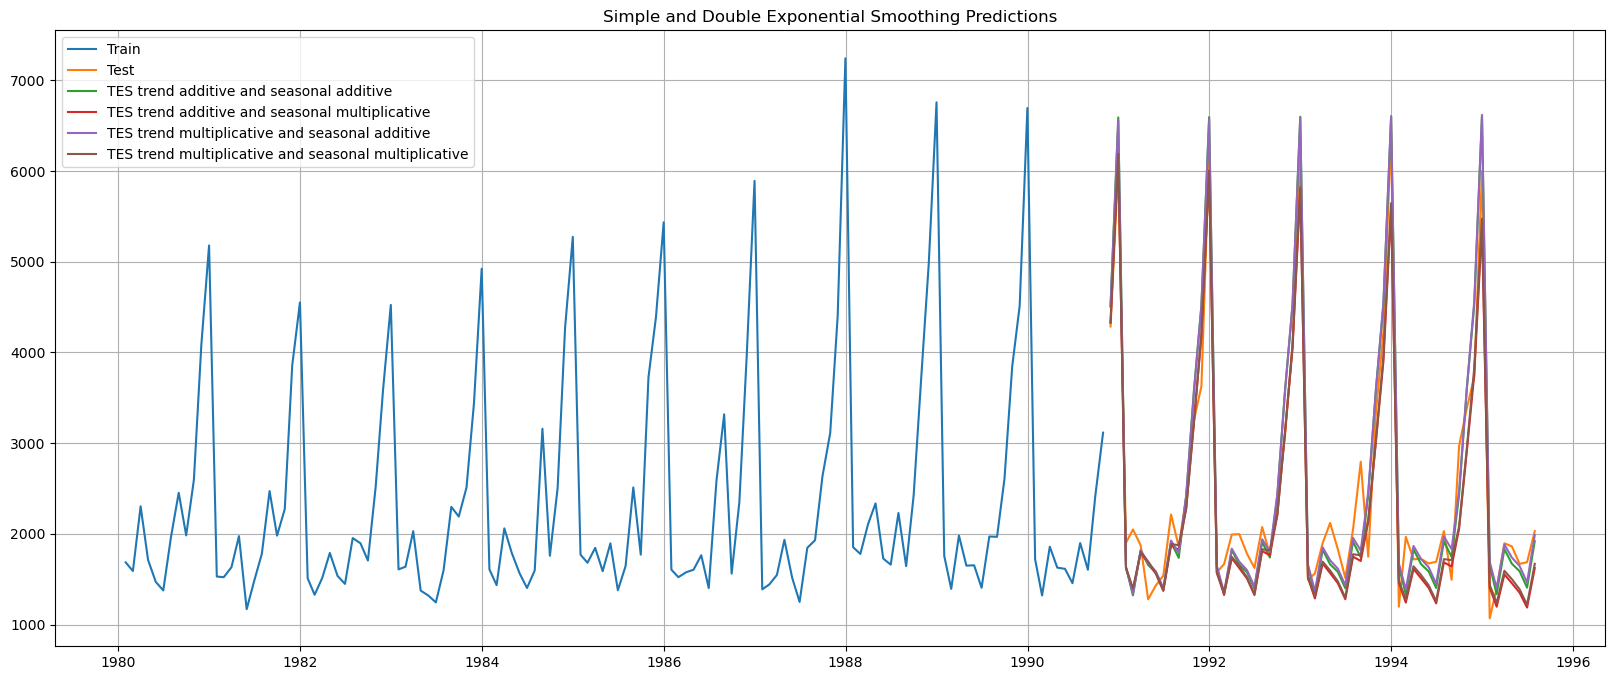

In [93]:
plt.plot(train_Sparkling['Sparkling'], label='Train')
plt.plot(test_Sparkling['Sparkling'], label='Test')

plt.plot(test_Sparkling_TES['predict_ta_sa'], label='TES trend additive and seasonal additive')
plt.plot(test_Sparkling_TES['predict_ta_sm'], label='TES trend additive and seasonal multiplicative')
plt.plot(test_Sparkling_TES['predict_tm_sa'], label='TES trend multiplicative and seasonal additive')
plt.plot(test_Sparkling_TES['predict_tm_sm'], label='TES trend multiplicative and seasonal multiplicative')
plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

# Check for Stationarity

Null Hypothesis H0 : Time Series is non-stationary.


Alternate Hypothesis Ha : Time Series is stationary.

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
dftest = adfuller(data_spa['Sparkling'])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


In [96]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

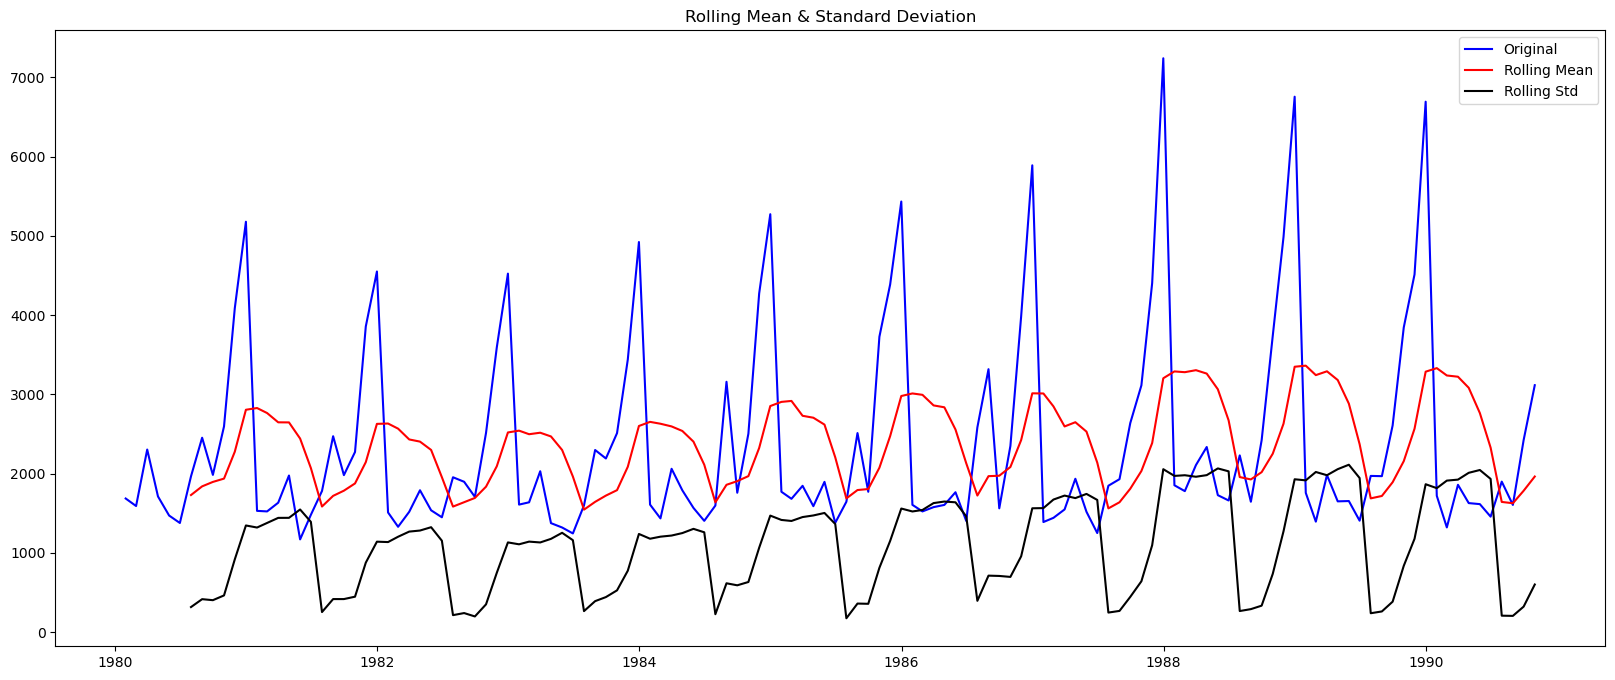

Results of Dickey-Fuller Test:
Test Statistic                  -1.155971
p-value                          0.692243
#Lags Used                      12.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [97]:
test_stationarity(train_Sparkling['Sparkling'])

## Data is non stationary

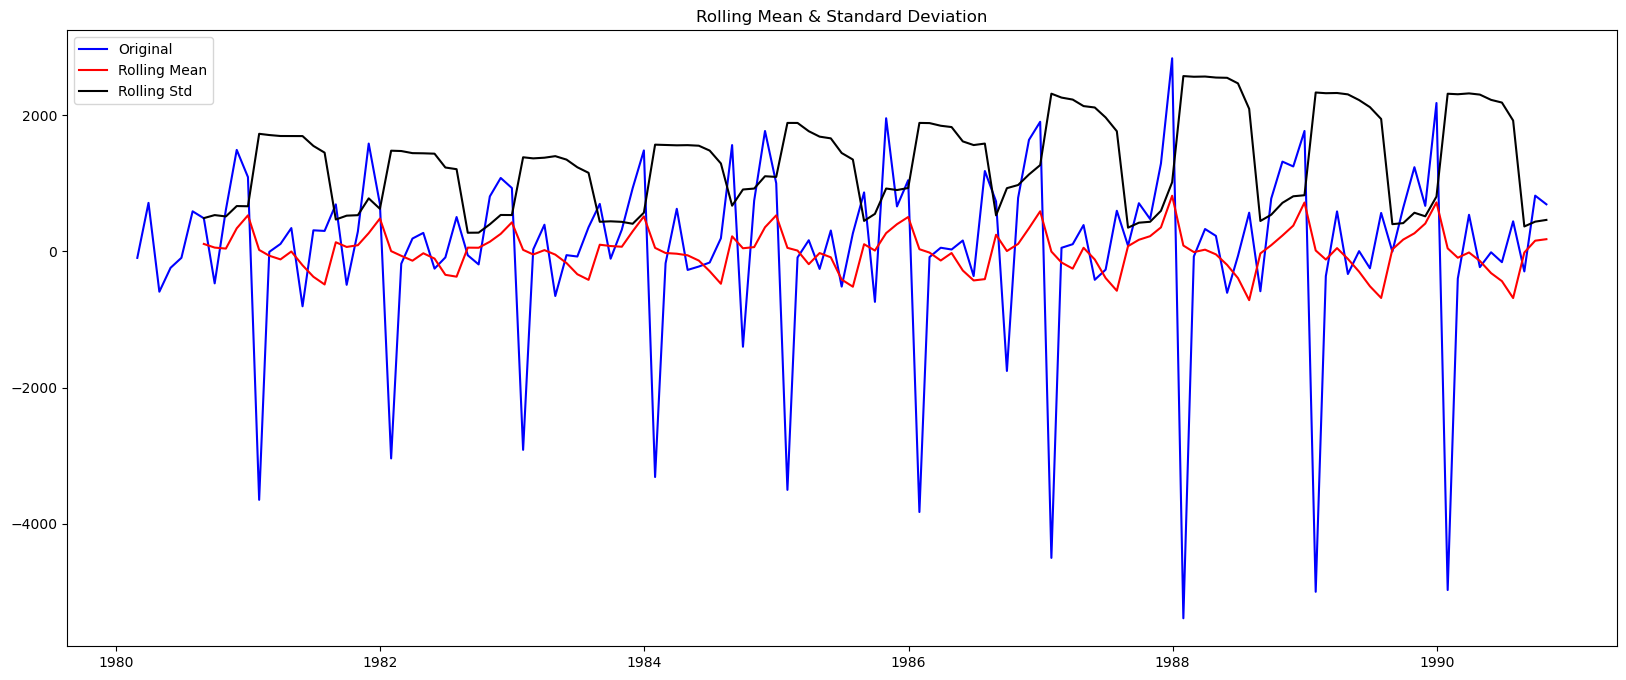

Results of Dickey-Fuller Test:
Test Statistic                -7.876510e+00
p-value                        4.827963e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64 



In [98]:
test_stationarity(train_Sparkling['Sparkling'].diff().dropna())

<Axes: xlabel='Year_Month'>

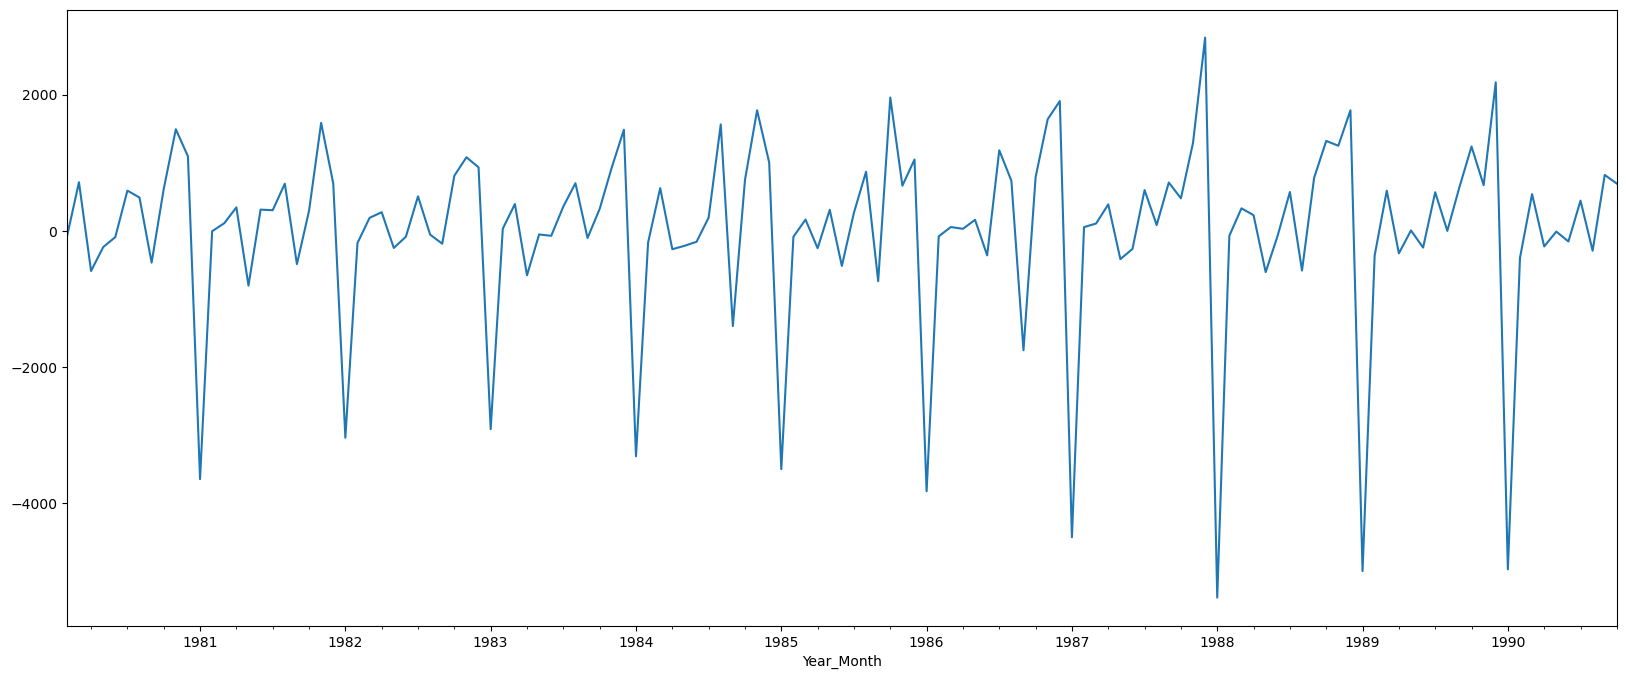

In [99]:
train_diff = train_Sparkling['Sparkling'].diff().dropna()
train_diff.plot()

Model Building - Stationary Data

    Generate ACF & PACF Plot and find the AR, MA values. - Build different ARIMA models - Auto ARIMA - Manual ARIMA - Build different SARIMA models - Auto SARIMA - Manual SARIMA - Check the performance of the models built



In [100]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


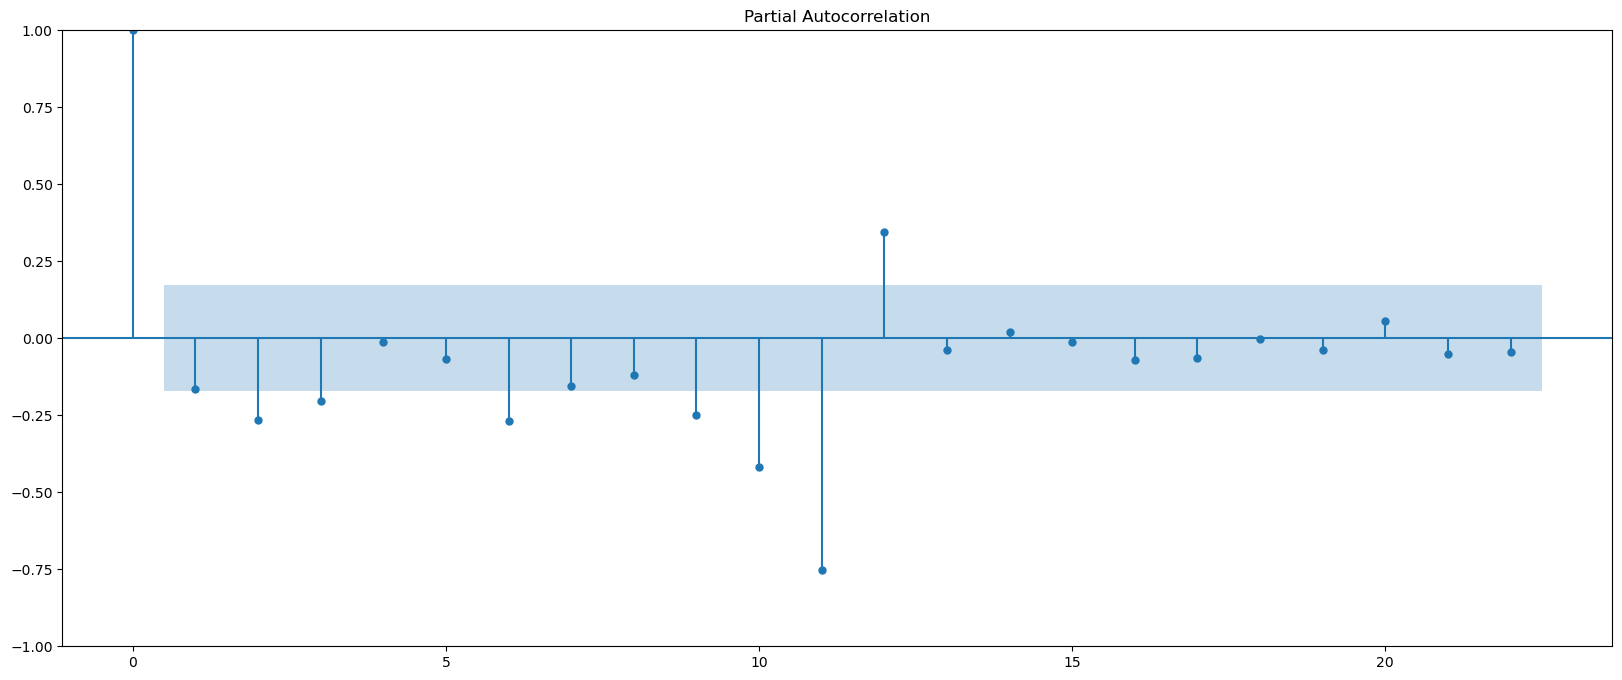

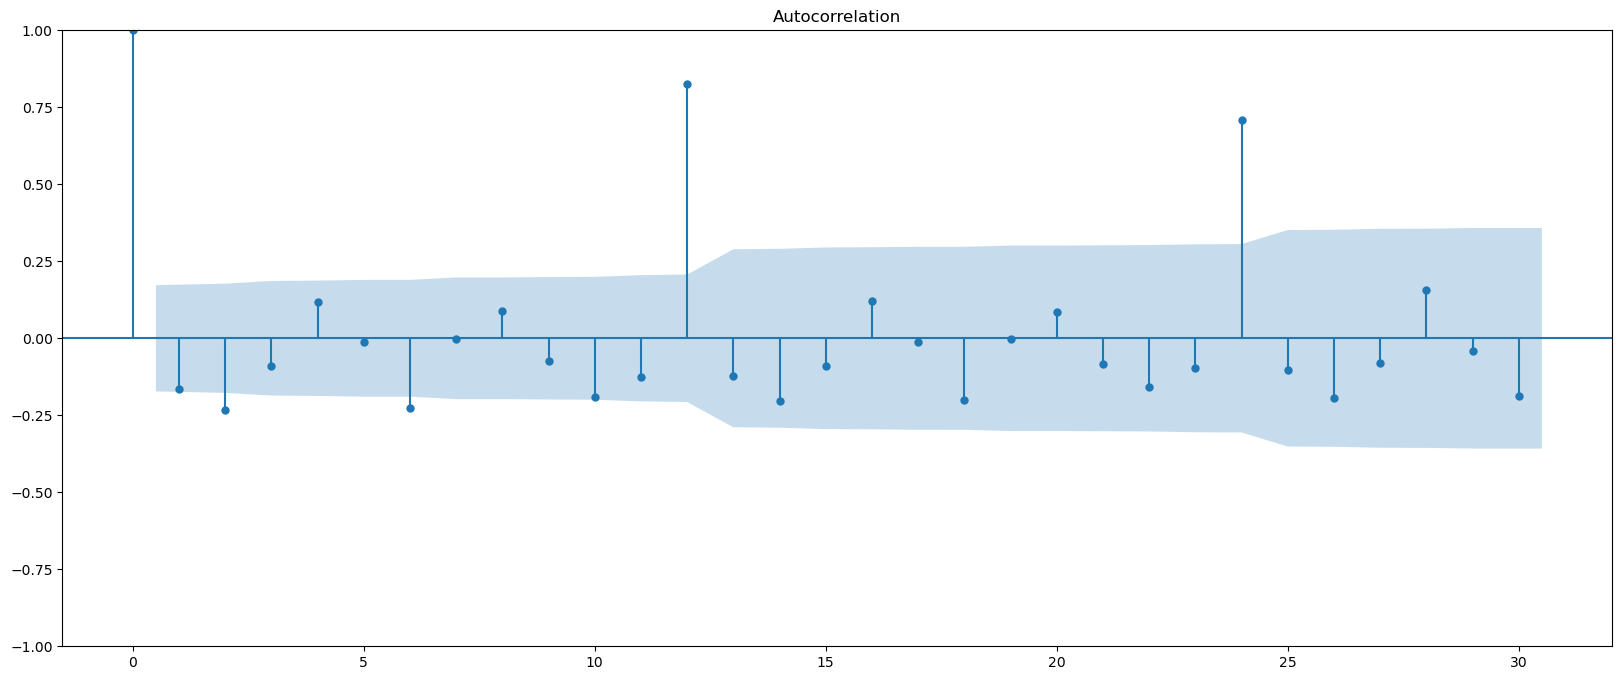

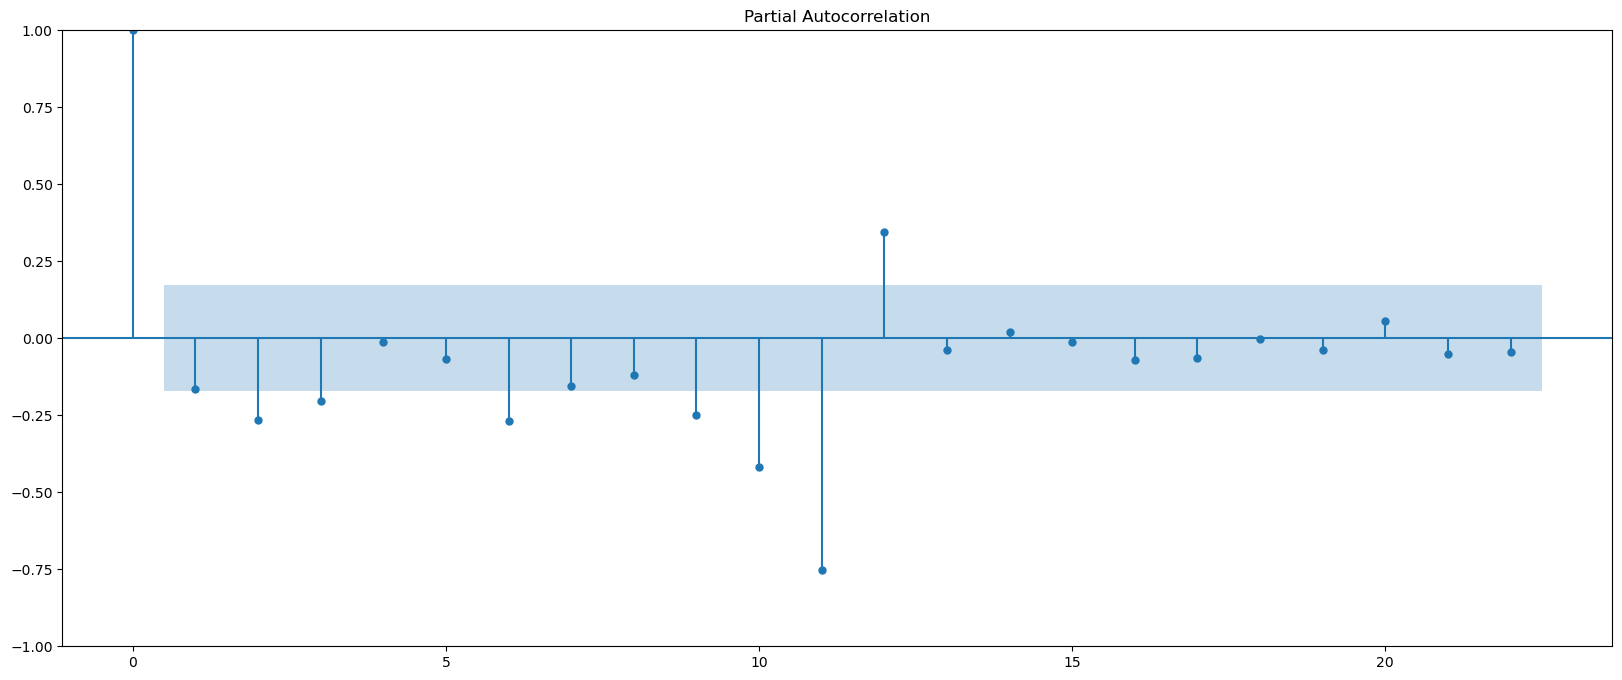

In [101]:
plot_acf(train_diff,lags=30)
plot_pacf(train_diff)

Value of , p and q between 0 and 2

In [102]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [103]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [104]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_Sparkling['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) - AIC:2232.719438106631


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) - AIC:2217.9392215777407


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2) - AIC:2194.034361361603
ARIMA(1, 1, 0) - AIC:2231.137663012458


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.appe

ARIMA(1, 1, 1) - AIC:2196.050085992837


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) - AIC:2194.9596533941058


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0) - AIC:2223.899470277437


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 1) - AIC:2193.9749624411756


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 2) - AIC:2178.109741758807


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\117386348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [105]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2178.109742
7  (2, 1, 1)  2193.974962
2  (0, 1, 2)  2194.034361
5  (1, 1, 2)  2194.959653
4  (1, 1, 1)  2196.050086
1  (0, 1, 1)  2217.939222
6  (2, 1, 0)  2223.899470
3  (1, 1, 0)  2231.137663
0  (0, 1, 0)  2232.719438

In [106]:
auto_ARIMA = ARIMA(train_Sparkling['Sparkling'],order =(2,1,2),freq= 'M')
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1084.055
Date:                Sun, 17 Mar 2024   AIC                           2178.110
Time:                        12:20:23   BIC                           2192.409
Sample:                    01-31-1980   HQIC                          2183.920
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3020      0.046     28.556      0.000       1.213       1.391
ar.L2         -0.5360      0.079     -6.744      0.000      -0.692      -0.380
ma.L1         -1.9914      0.110    -18.144      0.0

In [107]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_Sparkling))

In [108]:
rmse_auto = mean_squared_error(test_Sparkling['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse_auto)

1325.1666922842608


In [109]:
auto_arima = pd.DataFrame({'Test RMSE': rmse_auto },index=['Auto Arima (2,1,2)'])

In [110]:
Eval_DF = pd.concat([Eval_DF,auto_arima])
Eval_DF

Test RMSE
Linear Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.0375,Simple Exponentital Smoothing          1362.428949
Alpha=0.0756,Beta=0.07564:Double Exponential Sm...  1468.015409
Alpha= 0.0687,Beta=0.0265,Gamma = 0.5279:TES_TA...   377.435453
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3765:TES_TA...   381.656873
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3423:TES_TM...   362.826050
Alpha= 0.0752,Beta=0.02139,Gamma = 0.4767:TES_T...   369.484818
Auto Arima (2,1,2)                                  1325.166692

# Auto Sarima

In [111]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [112]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [113]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_Sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2216.4189020489616


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1921.5151801494428


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1691.5049017311135
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1807.2950161665542


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1777.6492913875936


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1601.281534210686
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1618.9670228363275


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1617.7268547329381


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1602.0623659586875
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2193.281680181417


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1888.586879400852


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1658.7576059597727


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1768.1554049141737


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1704.8427340687474


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1536.3191140063623


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1575.2496935599286


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1564.914938106286


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1536.4110100898533


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2143.9209005636144


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1853.6747164387007


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1624.7573104704063


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1760.7216575032935


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1691.3744541826234


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1524.5445635664619


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1573.2338748491018


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1566.7497102442885


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1523.707297445998
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2214.8516264604455


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1919.1580486807736


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1689.8880118557004


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1782.024250138373


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1759.3455844990913


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1587.2527635495294


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1593.0151241877663


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1587.7818267290863


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1587.047435808122
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2165.914890109114


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1872.2057291202082


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1645.1190352118178


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1746.0411803297475


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1706.694098094166


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1537.9253340980931


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1560.2276828189008


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1552.240393700364


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1538.0472368521553


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2145.0969765925192


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1855.5409901543662


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1626.6068233460092


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1741.9499619304324


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1690.7536722115078


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1526.1303763133685


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1557.6302875668944


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1551.391409823724


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1521.730111888698
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2190.8338694577515


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1913.1070230455437


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1678.6510971332868


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1751.4274988004106


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1726.3381339003854


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1570.246543600735


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1563.206857395157


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1556.4078450189822


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1554.9512533857278


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2160.248304476649


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1870.9922931384324


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1642.5176683686248


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1730.221836893804


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1706.7535527509826


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1538.3451039658637


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1546.7290693949046


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1538.7173918822784


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1538.2657053809605


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2140.6693959723266


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1857.4627247035096


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1631.3962993542411


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1727.5761549651377


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1691.8846284716524


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1523.5249462697873


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1545.3875469926356


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1539.0422090041748


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1523.2230486999015


C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2514647614.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [114]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1521.730112
80  (2, 1, 2)  (2, 0, 2, 12)  1523.223049
77  (2, 1, 2)  (1, 0, 2, 12)  1523.524946
26  (0, 1, 2)  (2, 0, 2, 12)  1523.707297
23  (0, 1, 2)  (1, 0, 2, 12)  1524.544564

In [115]:
import statsmodels.api as sm

auto_SARIMA_12= sm.tsa.statespace.SARIMAX(train_Sparkling['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -752.865
Date:                            Sun, 17 Mar 2024   AIC                           1521.730
Time:                                    12:22:58   BIC                           1542.730
Sample:                                         0   HQIC                          1530.234
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6468      0.268     -2.413      0.016      -1.172      -0.121
ma.L1          0.1769      0.344   

In [116]:
predicted_auto_SARIMA = results_auto_SARIMA_12.forecast(steps=len(test_Sparkling))

In [117]:
rmse_auto_sarima = mean_squared_error(test_Sparkling['Sparkling'],predicted_auto_SARIMA,squared=False)
print(rmse_auto_sarima)

712.2951524311145


In [118]:
auto_sarima = pd.DataFrame({'Test RMSE': rmse_auto_sarima },index=['Auto SArima (1, 1, 2)x(2, 0, 2, 12) '])

In [119]:
Eval_DF = pd.concat([Eval_DF,auto_sarima])
Eval_DF

Test RMSE
Linear Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.0375,Simple Exponentital Smoothing          1362.428949
Alpha=0.0756,Beta=0.07564:Double Exponential Sm...  1468.015409
Alpha= 0.0687,Beta=0.0265,Gamma = 0.5279:TES_TA...   377.435453
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3765:TES_TA...   381.656873
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3423:TES_TM...   362.826050
Alpha= 0.0752,Beta=0.02139,Gamma = 0.4767:TES_T...   369.484818
Auto Arima (2,1,2)                                  1325.166692
Auto SArima (1, 1, 2)x(2, 0, 2, 12)                  712.295152

# Manual ARIMA

## For manual ARIMA, I would use the cut off points for p, q and d from the ACF and PACF plots

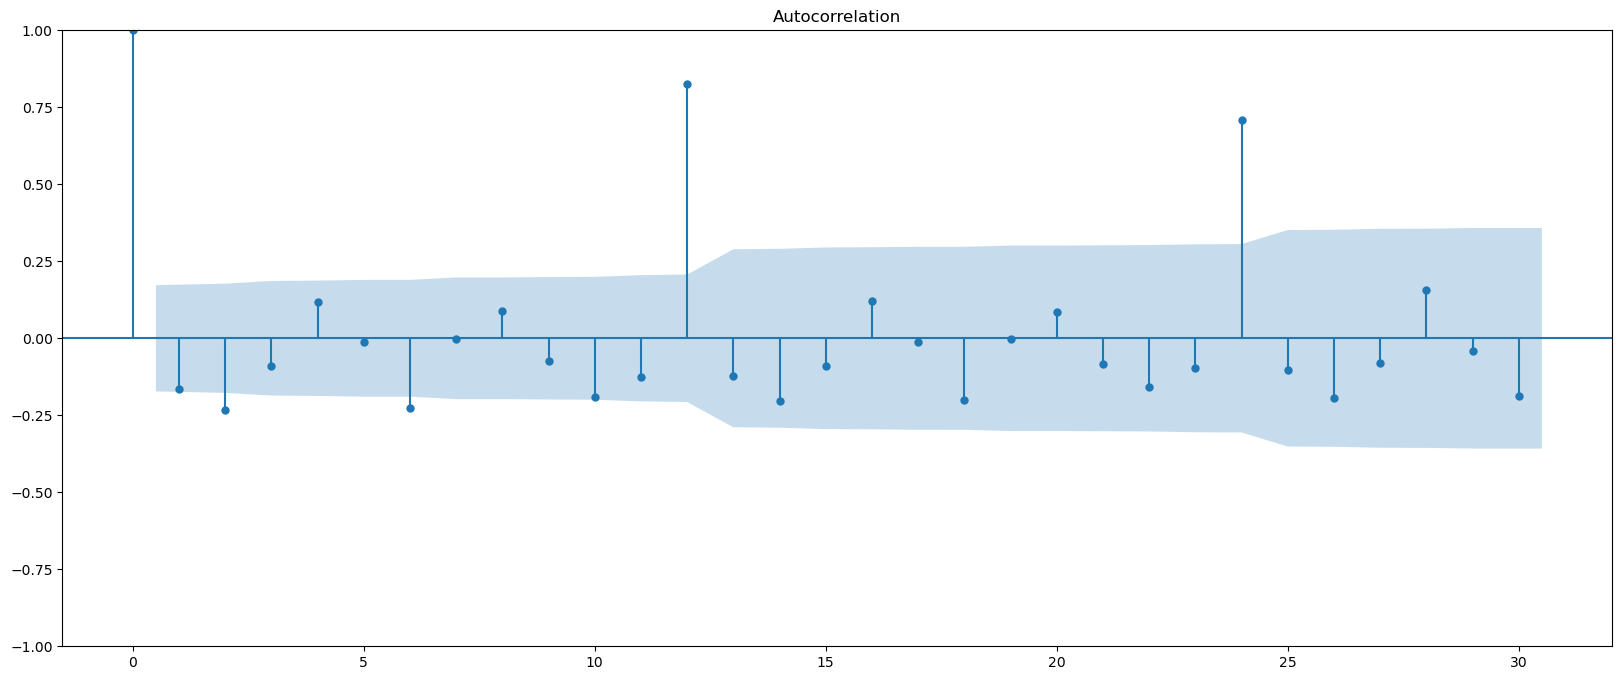

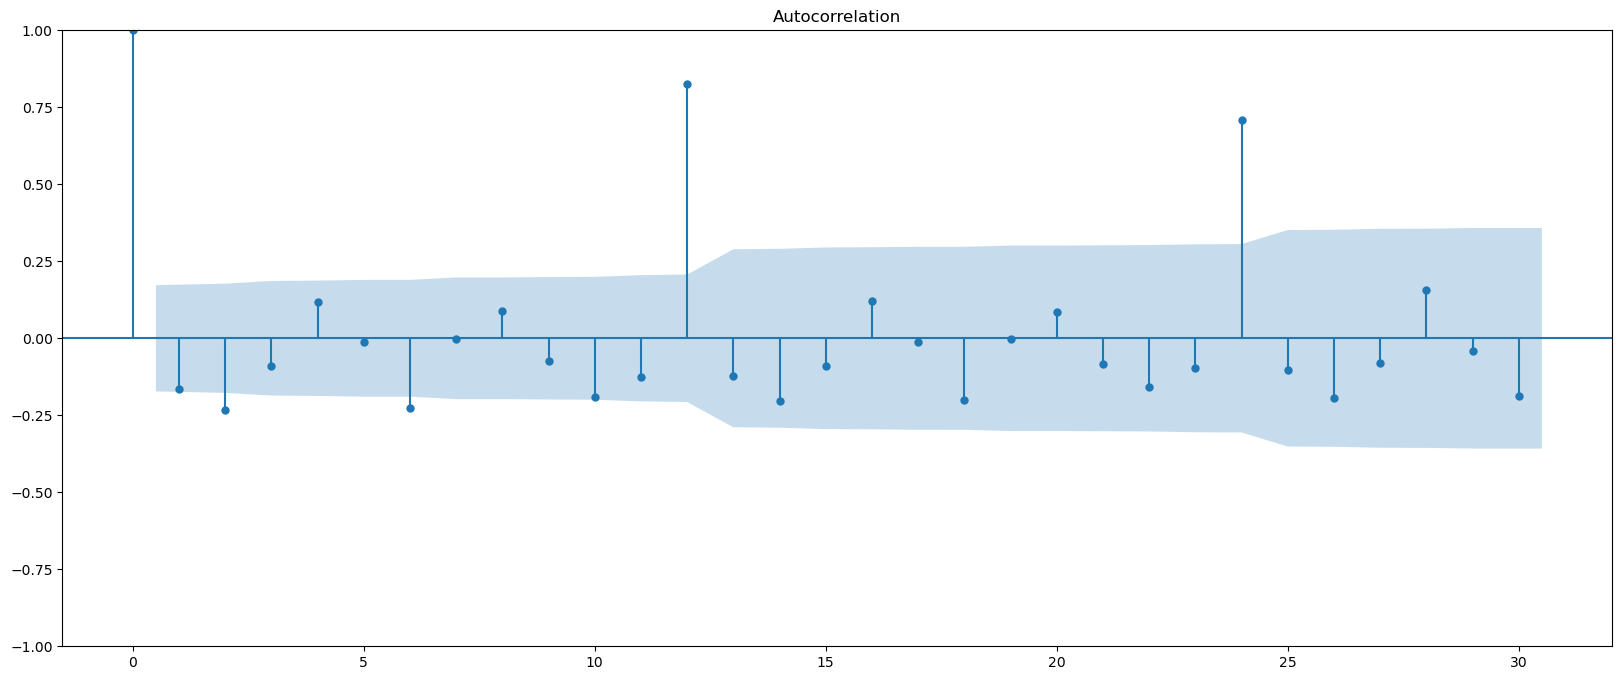

In [120]:
plot_acf(train_diff,lags=30)


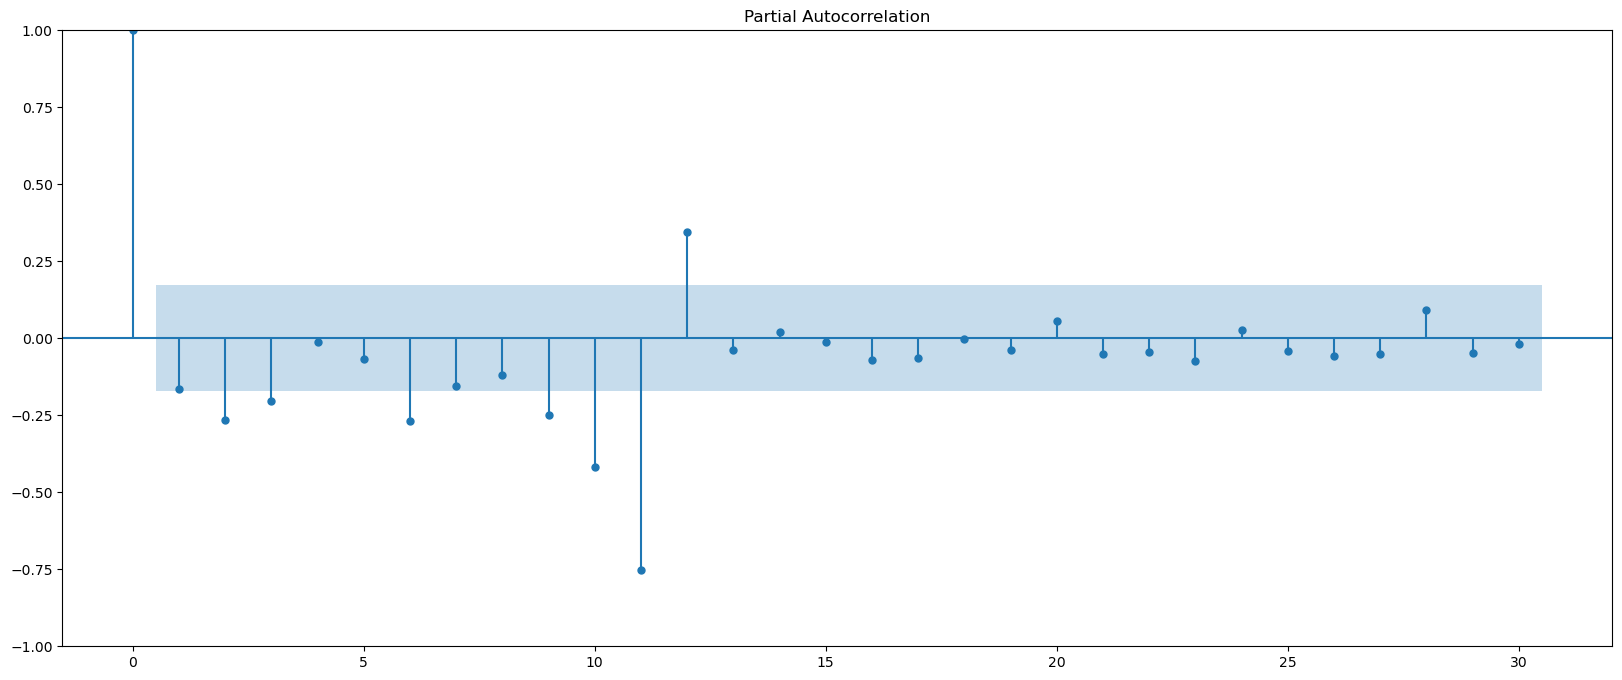

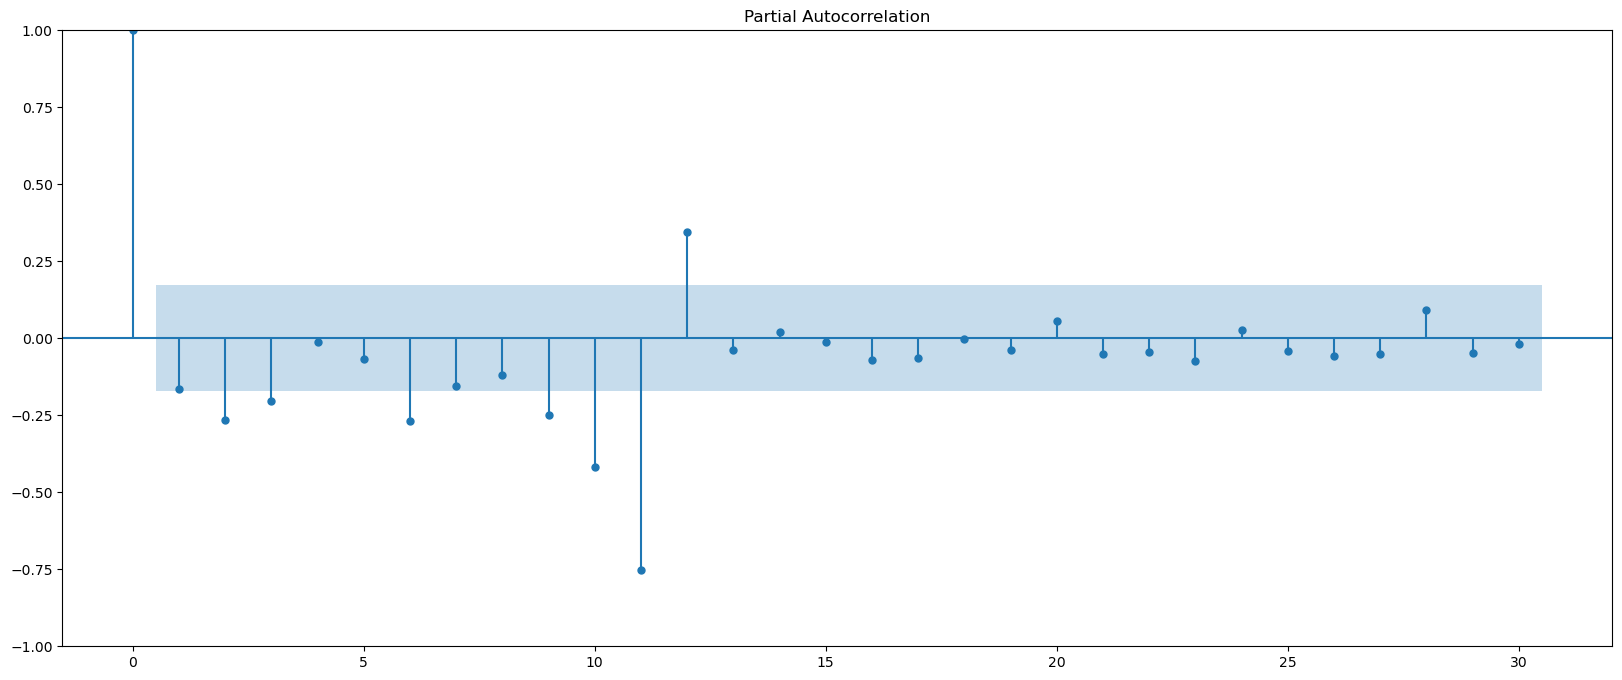

In [121]:
plot_pacf(train_diff, lags = 30)

In [122]:
manual_ARIMA = ARIMA(train_Sparkling['Sparkling'], order=(1,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1093.480
Date:                Sun, 17 Mar 2024   AIC                           2194.960
Time:                        12:23:01   BIC                           2206.399
Sample:                    01-31-1980   HQIC                          2199.608
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1817      0.303      0.599      0.549      -0.412       0.776
ma.L1         -0.7028      0.395     -1.779      0.075      -1.477       0.072
ma.L2         -0.2972      0.381     -0.780      0.4

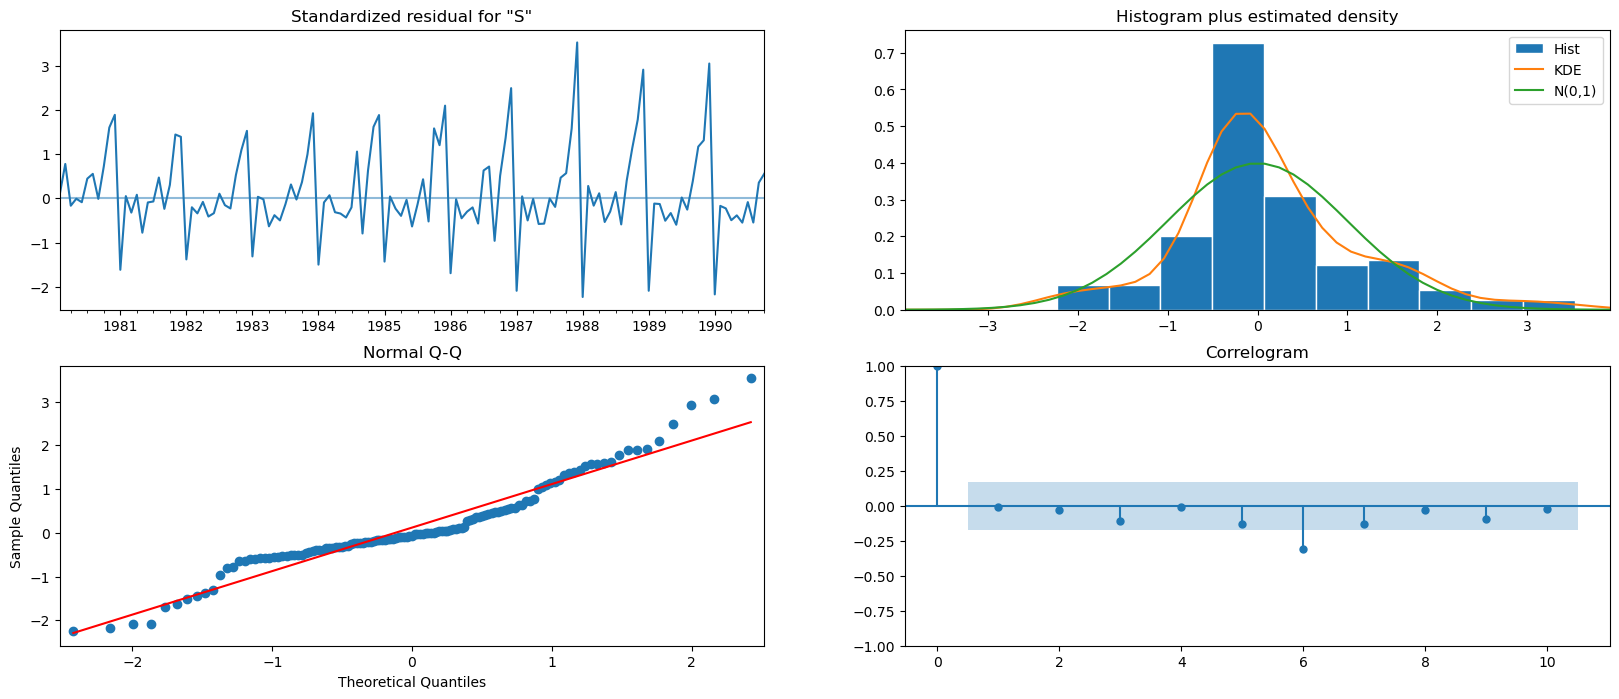

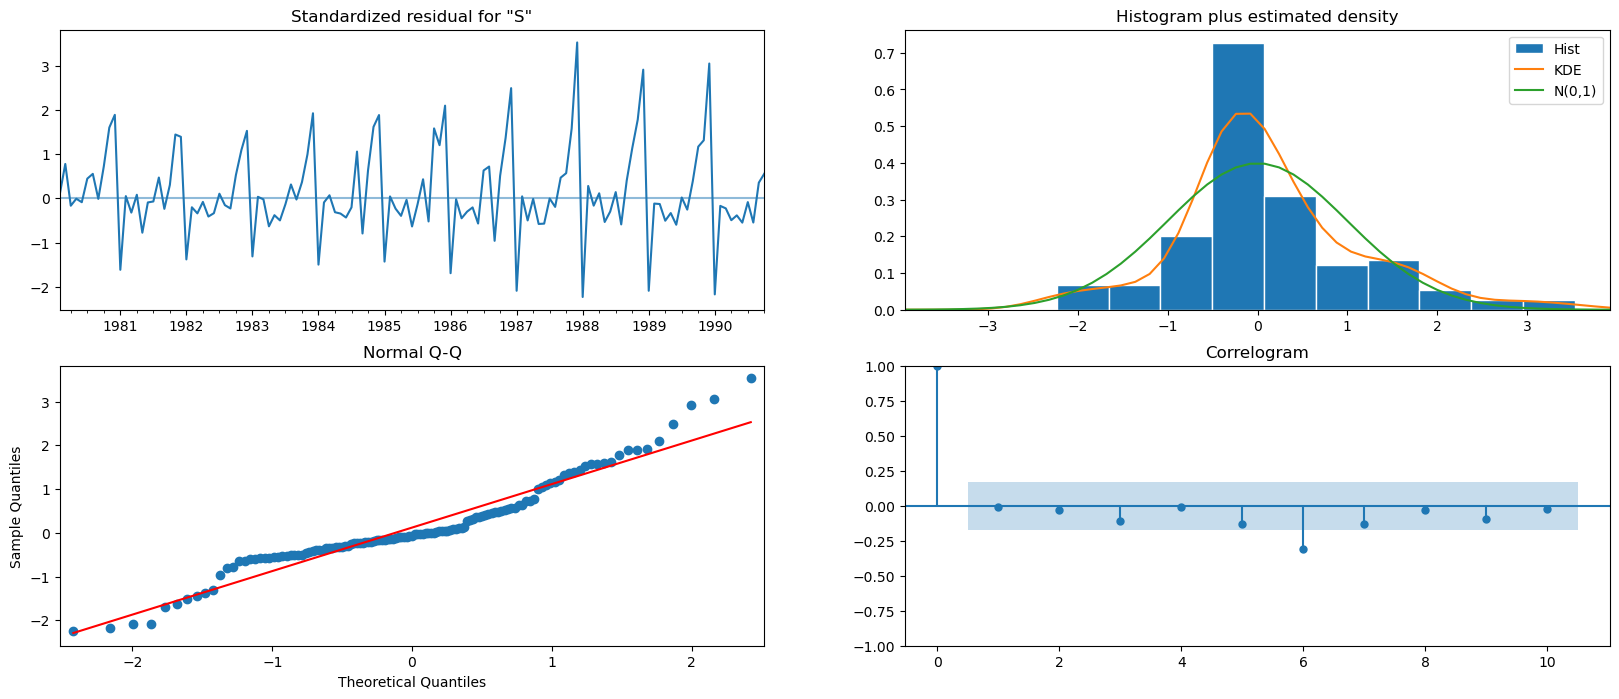

In [123]:

results_manual_ARIMA.plot_diagnostics()

In [124]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_Sparkling))
rmse_manual_arima= mean_squared_error(test_Sparkling['Sparkling'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse_manual_arima)

RMSE: 1359.9244381086564


In [125]:
manual_arima = pd.DataFrame({'Test RMSE': rmse_manual_arima },index=['Manual Arima (1,1,2) '])
Eval_DF = pd.concat([Eval_DF,manual_arima])
Eval_DF

Test RMSE
Linear Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.0375,Simple Exponentital Smoothing          1362.428949
Alpha=0.0756,Beta=0.07564:Double Exponential Sm...  1468.015409
Alpha= 0.0687,Beta=0.0265,Gamma = 0.5279:TES_TA...   377.435453
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3765:TES_TA...   381.656873
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3423:TES_TM...   362.826050
Alpha= 0.0752,Beta=0.02139,Gamma = 0.4767:TES_T...   369.484818
Auto Arima (2,1,2)                                  1325.166692
Auto SArima (1, 1, 2)x(2, 0, 2, 12)                  712.295152
Manual Arima (1,1,2)                                1359.924438

# Manual Sarima

In [126]:
manual_SARIMA_12= sm.tsa.statespace.SARIMAX(train_Sparkling['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2, 11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 11)   Log Likelihood                -798.621
Date:                            Sun, 17 Mar 2024   AIC                           1611.243
Time:                                    12:23:09   BIC                           1628.971
Sample:                                         0   HQIC                          1618.401
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3144      0.191     -1.650      0.099      -0.688       0.059
ma.L1         -0.1346      0.407   

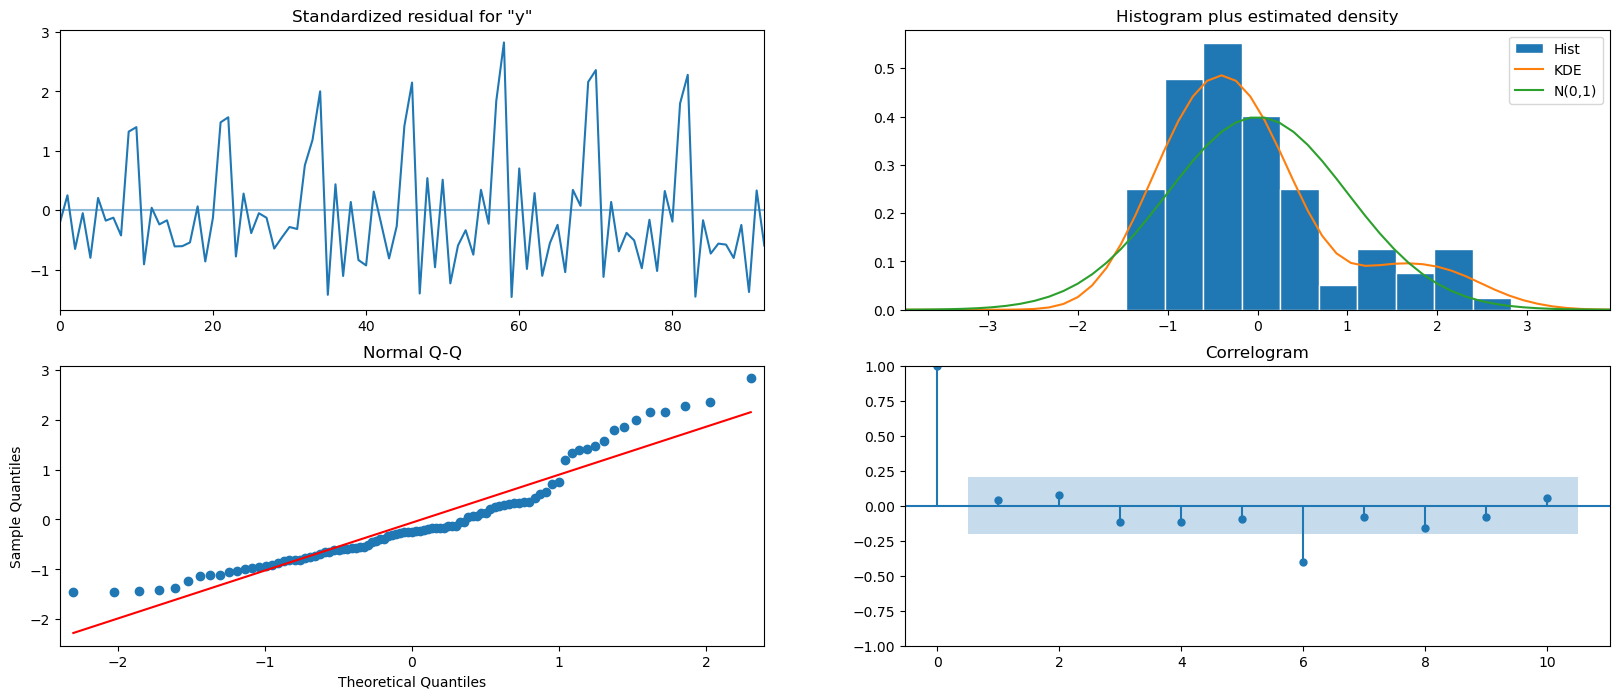

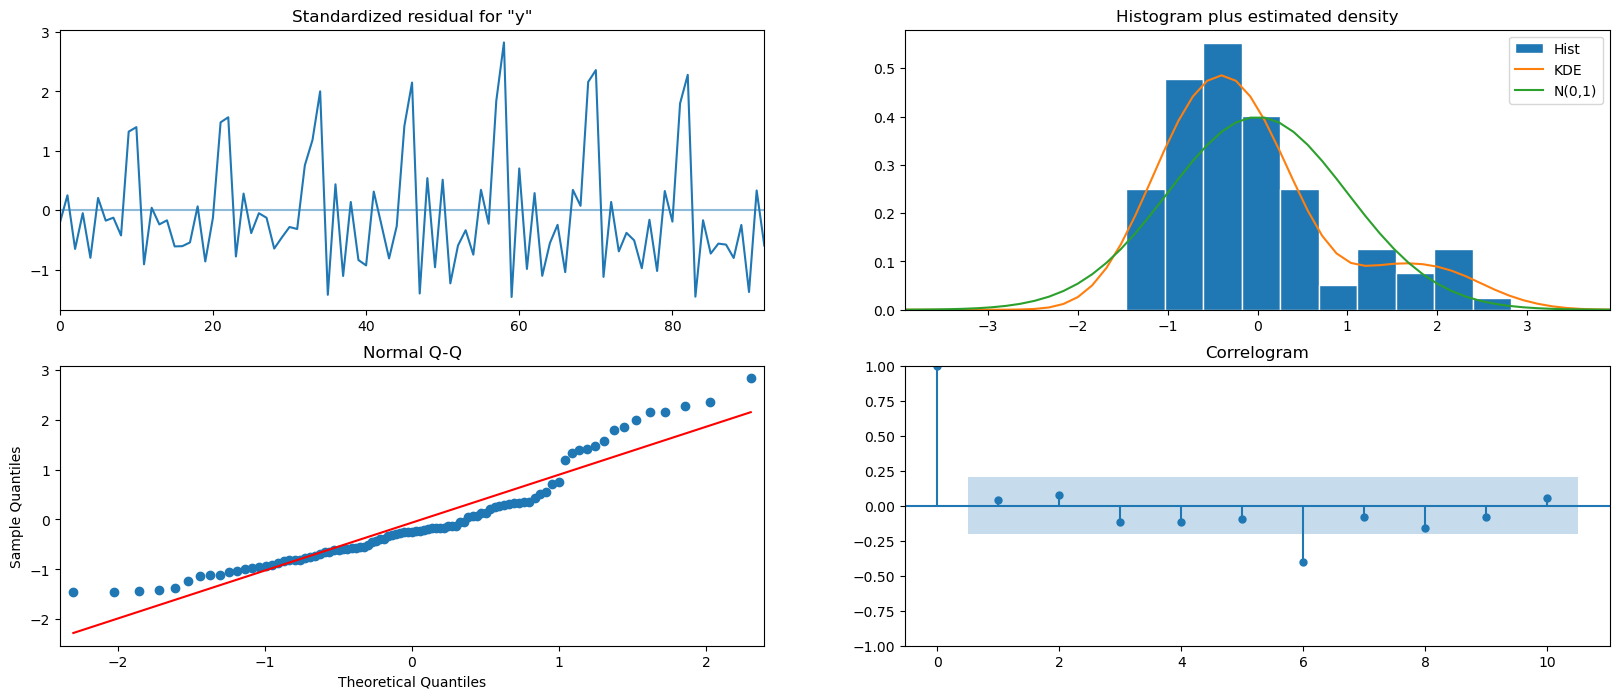

In [127]:
results_manual_SARIMA_12.plot_diagnostics()

In [128]:
predicted_manual_SARIMA = results_manual_SARIMA_12.forecast(steps=len(test_Sparkling))
rmse_manual_sarima= mean_squared_error(test_Sparkling['Sparkling'],predicted_manual_SARIMA,squared=False)
print('RMSE:',rmse_manual_sarima)

RMSE: 1573.2365888331128


In [129]:
manual_sarima = pd.DataFrame({'Test RMSE': rmse_manual_sarima },index=['Manual SArima (1, 1, 2)x(1, 1, 2, 11) '])
Eval_DF = pd.concat([Eval_DF,manual_sarima])
Eval_DF

Test RMSE
Linear Regression                                   1392.438305
SimpleAverageModel                                  1368.746717
2pointTrailingMovingAverage                          811.178937
4pointTrailingMovingAverage                         1184.213295
6pointTrailingMovingAverage                         1337.200524
9pointTrailingMovingAverage                         1422.653281
Alpha=0.0375,Simple Exponentital Smoothing          1362.428949
Alpha=0.0756,Beta=0.07564:Double Exponential Sm...  1468.015409
Alpha= 0.0687,Beta=0.0265,Gamma = 0.5279:TES_TA...   377.435453
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3765:TES_TA...   381.656873
Alpha= 0.0757,Beta=0.0648,Gamma = 0.3423:TES_TM...   362.826050
Alpha= 0.0752,Beta=0.02139,Gamma = 0.4767:TES_T...   369.484818
Auto Arima (2,1,2)                                  1325.166692
Auto SArima (1, 1, 2)x(2, 0, 2, 12)                  712.295152
Manual Arima (1,1,2)                                1359.924438
Manual SArima (1, 1, 2)x(1, 1, 2, 11)               1573.236589

# Compare the performance of the models
- Compare the performance of all the models built - Choose the best model with proper rationale - Rebuild the best model using the entire data - Make a forecast for the next 12 months

In [137]:
model_tes_tm_sm = ExponentialSmoothing(data_spa['Sparkling'], trend = 'multiplicative', seasonal = 'multiplicative')

C:\Users\ebyeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [138]:
Alpha= 0.757
Beta=0.0648
Gamma = 0.3423


In [139]:
model_TES = model_tes_tm_sm.fit(smoothing_level=Alpha,smoothing_slope=Beta,smoothing_seasonal=Gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\ebyeb\AppData\Local\Temp\ipykernel_13168\2980513220.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_TES = model_tes_tm_sm.fit(smoothing_level=Alpha,smoothing_slope=Beta,smoothing_seasonal=Gamma,


In [140]:
prediction

1995-08-31    2092.094447
1995-09-30    3046.204670
1995-10-31    3787.471995
1995-11-30    4830.630449
1995-12-31    7730.080072
1996-01-31    1615.556429
1996-02-29    2239.781755
1996-03-31    2420.258936
1996-04-30    2163.208566
1996-05-31    2000.121836
1996-06-30    2002.578129
1996-07-31    2634.852677
Freq: M, dtype: float64

In [141]:
date_future = pd.date_range(start='8/31/1995', end='7/31/1996', freq='M')
date_future

DatetimeIndex(['1995-08-31', '1995-09-30', '1995-10-31', '1995-11-30',
               '1995-12-31', '1996-01-31', '1996-02-29', '1996-03-31',
               '1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31'],
              dtype='datetime64[ns]', freq='M')

In [135]:
future_predictions=pd.DataFrame(columns=['Sparkling_sales'],index=date_future)

In [142]:
future_predictions['Sparkling_sales']=prediction
future_predictions

Sparkling_sales
1995-08-31      2092.094447
1995-09-30      3046.204670
1995-10-31      3787.471995
1995-11-30      4830.630449
1995-12-31      7730.080072
1996-01-31      1615.556429
1996-02-29      2239.781755
1996-03-31      2420.258936
1996-04-30      2163.208566
1996-05-31      2000.121836
1996-06-30      2002.578129
1996-07-31      2634.852677